# <p> <center style="background-color:#962626;font-family:Gabriola;color:white;font-size:200%;text-align:center;border-radius:0px">  Heart Disease  Prediction🫀  </center></p>


<p style="font-family:Georgia;padding:20px;line-height:25px;background-color:white;color:black;border-style:solid;border-color:white">
    <font style="font-family:Georgia;color:black; font-size:160%;">Problem Statement</font><br>
    <font style="font-family:Georgia;color:black; font-size:120%;">The goal of this notebook is to build a classifier that can classify potential heart-disease patients accurately as much as possible.</font><br><br>
    <font style="font-family:Georgia;color:black; font-size:160%;">About Dataset</font><br>
    <font style="font-family:Georgia;color:black; font-size:120%;">
        - The dataset originally comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents.<br>
        - In this notebook, we will use a merged dataset of the 2020 survey and 2022 survey consisting of more than 750,000 responses and 18 Attributes.
    </font>
</p>
 

<html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title></title>
    </head>
<body>

<ol>
    <li><a href="#8">Dataset Exploring</a></li>
    <li><a href="#1">Cleaning</a></li>
    <li><a href="#2">EDA and Visualizing</a></li>
    <li><a href="#4">Preprocessing Pipelines</a></li>
    <li><a href="#3">Setting Baseline Performance</a></li>
    <li><a href="#5">Sampling Techniqes</a></li>
    <li><a href="#6">Chosing a Model</a></li>
    <li><a href="#7">Hyperparameter Tuning</a></li>
    <li><a href="#9">Final Pipeline</a></li>
</ol>

</body>
</html>


<a id="8"></a>

# <p> <center style="background-color:#b84848;font-family:Gabriola;color:white;font-size:200%;text-align:center;border-radius:0px">1. Exploring Dataset</center></p>

In [1]:
import numpy as np 
import pandas as pd

currentDir = ''
import os
for dirname, _, filenames in os.walk(currentDir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import seaborn as sns    
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import missingno as msno 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# general style
sns.set_style("whitegrid")
sns.set_palette("vlag")

In [3]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=16)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [4]:
!pwd

/kaggle/working


In [5]:
# df = pd.read_csv(currentDir+"merged_data.csv")
df = pd.read_csv("/kaggle/input/merged-dataset/merged_data.csv")
print(df.shape)
df.head()

(764927, 18)


,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepTime,Stroke,Asthma,SkinCancer,Diabetic,BMI,AlcoholDrinking,Race,AgeCategory,HeartDisease,KidneyDisease,Smoking,DiffWalking
0,Female,Very good,0.0,0.0,No,8.0,No,No,No,Yes,NaN,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
1,Female,Very good,0.0,0.0,No,8.0,No,No,No,Yes,NaN,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
2,Female,Excellent,0.0,0.0,No,6.0,No,No,Yes,No,26.57,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
3,Female,Very good,2.0,3.0,Yes,5.0,No,No,Yes,No,25.61,No,"White only, Non-Hispanic",Age 55 to 59,No,No,Never smoked,No
4,Female,Excellent,0.0,0.0,Yes,7.0,No,Yes,No,No,23.30,No,"White only, Non-Hispanic",NaN,No,No,Current smoker - now smokes some days,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764927 entries, 0 to 764926
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               764927 non-null  object 
 1   GenHealth         763729 non-null  object 
 2   PhysicalHealth    754000 non-null  float64
 3   MentalHealth      755860 non-null  float64
 4   PhysicalActivity  763834 non-null  object 
 5   SleepTime         759474 non-null  float64
 6   Stroke            763370 non-null  object 
 7   Asthma            763154 non-null  object 
 8   SkinCancer        761784 non-null  object 
 9   Diabetic          763840 non-null  object 
 10  BMI               716121 non-null  float64
 11  AlcoholDrinking   718353 non-null  object 
 12  Race              750870 non-null  object 
 13  AgeCategory       755848 non-null  object 
 14  HeartDisease      761862 non-null  object 
 15  KidneyDisease     763001 non-null  object 
 16  Smoking           72

count null values

In [7]:
nans = df.isna().sum().sort_values(ascending = False)
pct = (nans/df.shape[0]) * 100
pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaNValuesCount', 1 : 'NaNValuesPercentage%'}).round(2)

,NaNValuesCount,NaNValuesPercentage%
BMI,48806,6.38
AlcoholDrinking,46574,6.09
Smoking,35462,4.64
DiffWalking,24012,3.14
Race,14057,1.84
PhysicalHealth,10927,1.43
AgeCategory,9079,1.19
MentalHealth,9067,1.19
SleepTime,5453,0.71
SkinCancer,3143,0.41


plot the percentage of null values

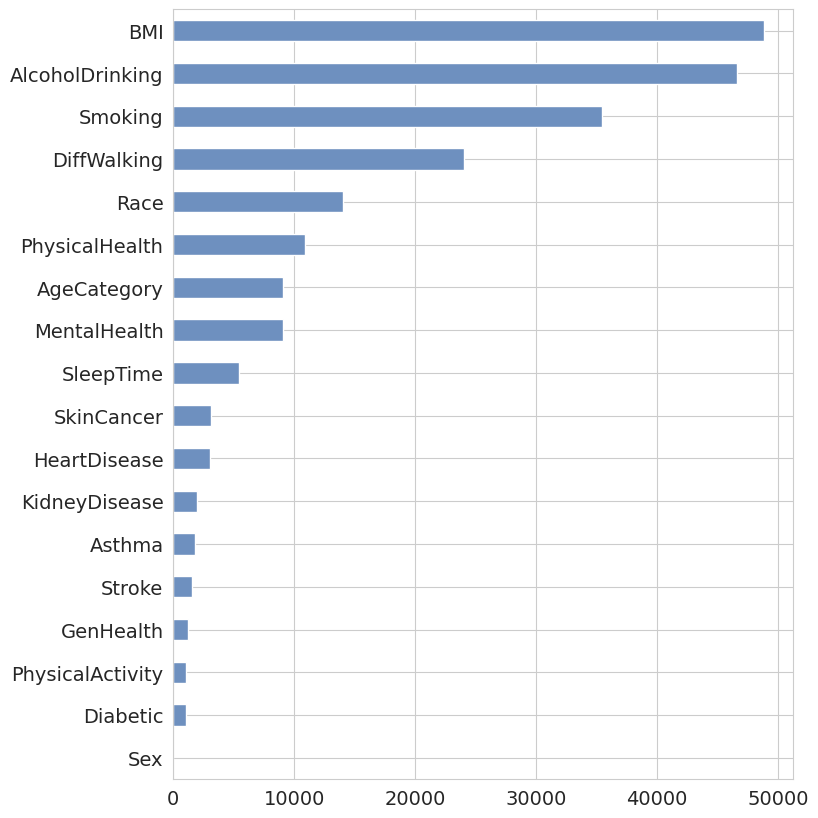

In [8]:
# Set the size
plt.figure(figsize=(8, 10))

df.isna().sum().sort_values().plot(kind='barh')
plt.show()

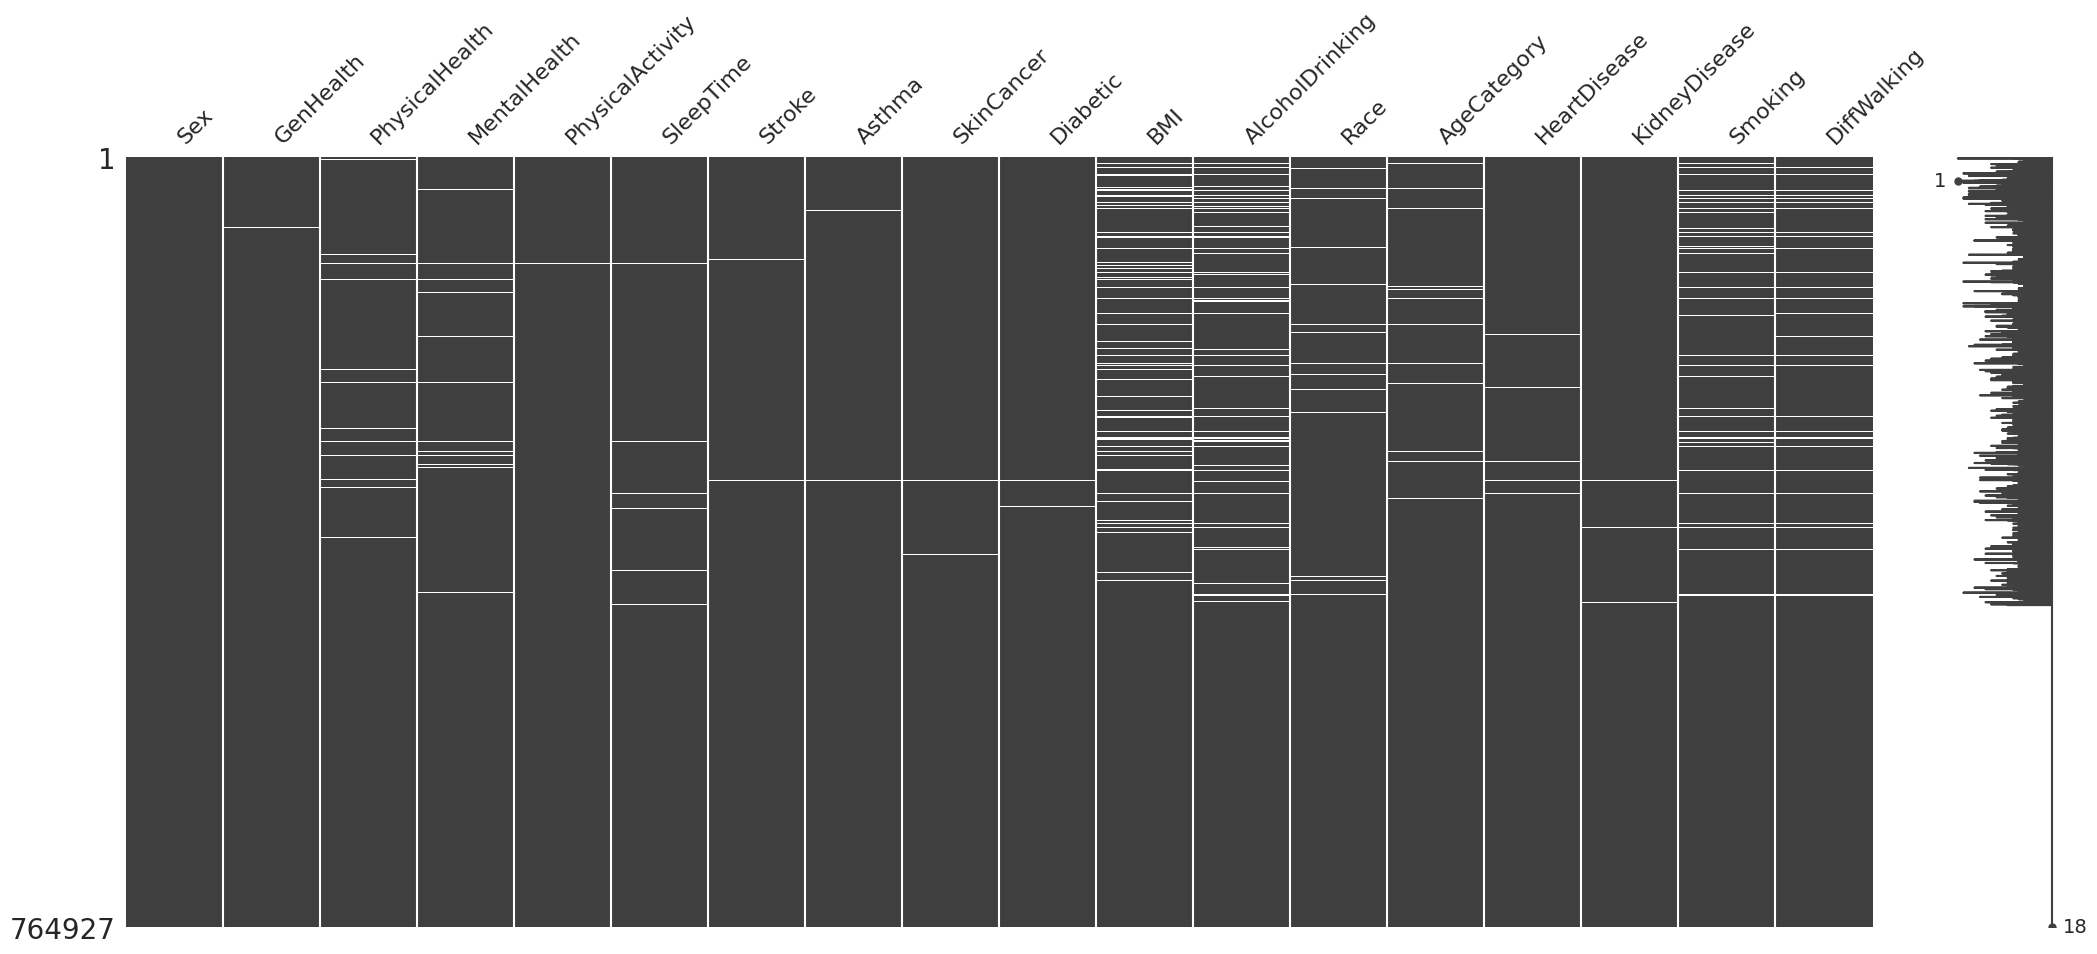

In [9]:
#viz missing
msno.matrix(df)
plt.show()

### Sorting Columns

In [10]:
col_order = ['Sex',  'AgeCategory', 'BMI',  #user info
             'GenHealth', 'PhysicalActivity', 'PhysicalHealth', 'MentalHealth', #genral health and habits
             'SleepTime', 'DiffWalking',
             'Smoking', 'AlcoholDrinking',
             'KidneyDisease', 'Asthma', 'SkinCancer', #user medical history
             'Stroke', 'Diabetic',
             'Race',
             'HeartDisease']

df = df[col_order]
df.head()

,Sex,AgeCategory,BMI,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
0,Female,Age 80 or older,NaN,Very good,No,0.0,0.0,8.0,No,Never smoked,No,No,No,No,No,Yes,"White only, Non-Hispanic",No
1,Female,Age 80 or older,NaN,Very good,No,0.0,0.0,8.0,No,Never smoked,No,No,No,No,No,Yes,"White only, Non-Hispanic",No
2,Female,Age 80 or older,26.57,Excellent,No,0.0,0.0,6.0,No,Never smoked,No,No,No,Yes,No,No,"White only, Non-Hispanic",No
3,Female,Age 55 to 59,25.61,Very good,Yes,2.0,3.0,5.0,No,Never smoked,No,No,No,Yes,No,No,"White only, Non-Hispanic",No
4,Female,NaN,23.30,Excellent,Yes,0.0,0.0,7.0,No,Current smoker - now smokes some days,No,No,Yes,No,No,No,"White only, Non-Hispanic",No


### Removing Missing Values

In [11]:
df = df.dropna()
df.isna().sum()

Sex                 0
AgeCategory         0
BMI                 0
GenHealth           0
PhysicalActivity    0
PhysicalHealth      0
MentalHealth        0
SleepTime           0
DiffWalking         0
Smoking             0
AlcoholDrinking     0
KidneyDisease       0
Asthma              0
SkinCancer          0
Stroke              0
Diabetic            0
Race                0
HeartDisease        0
dtype: int64

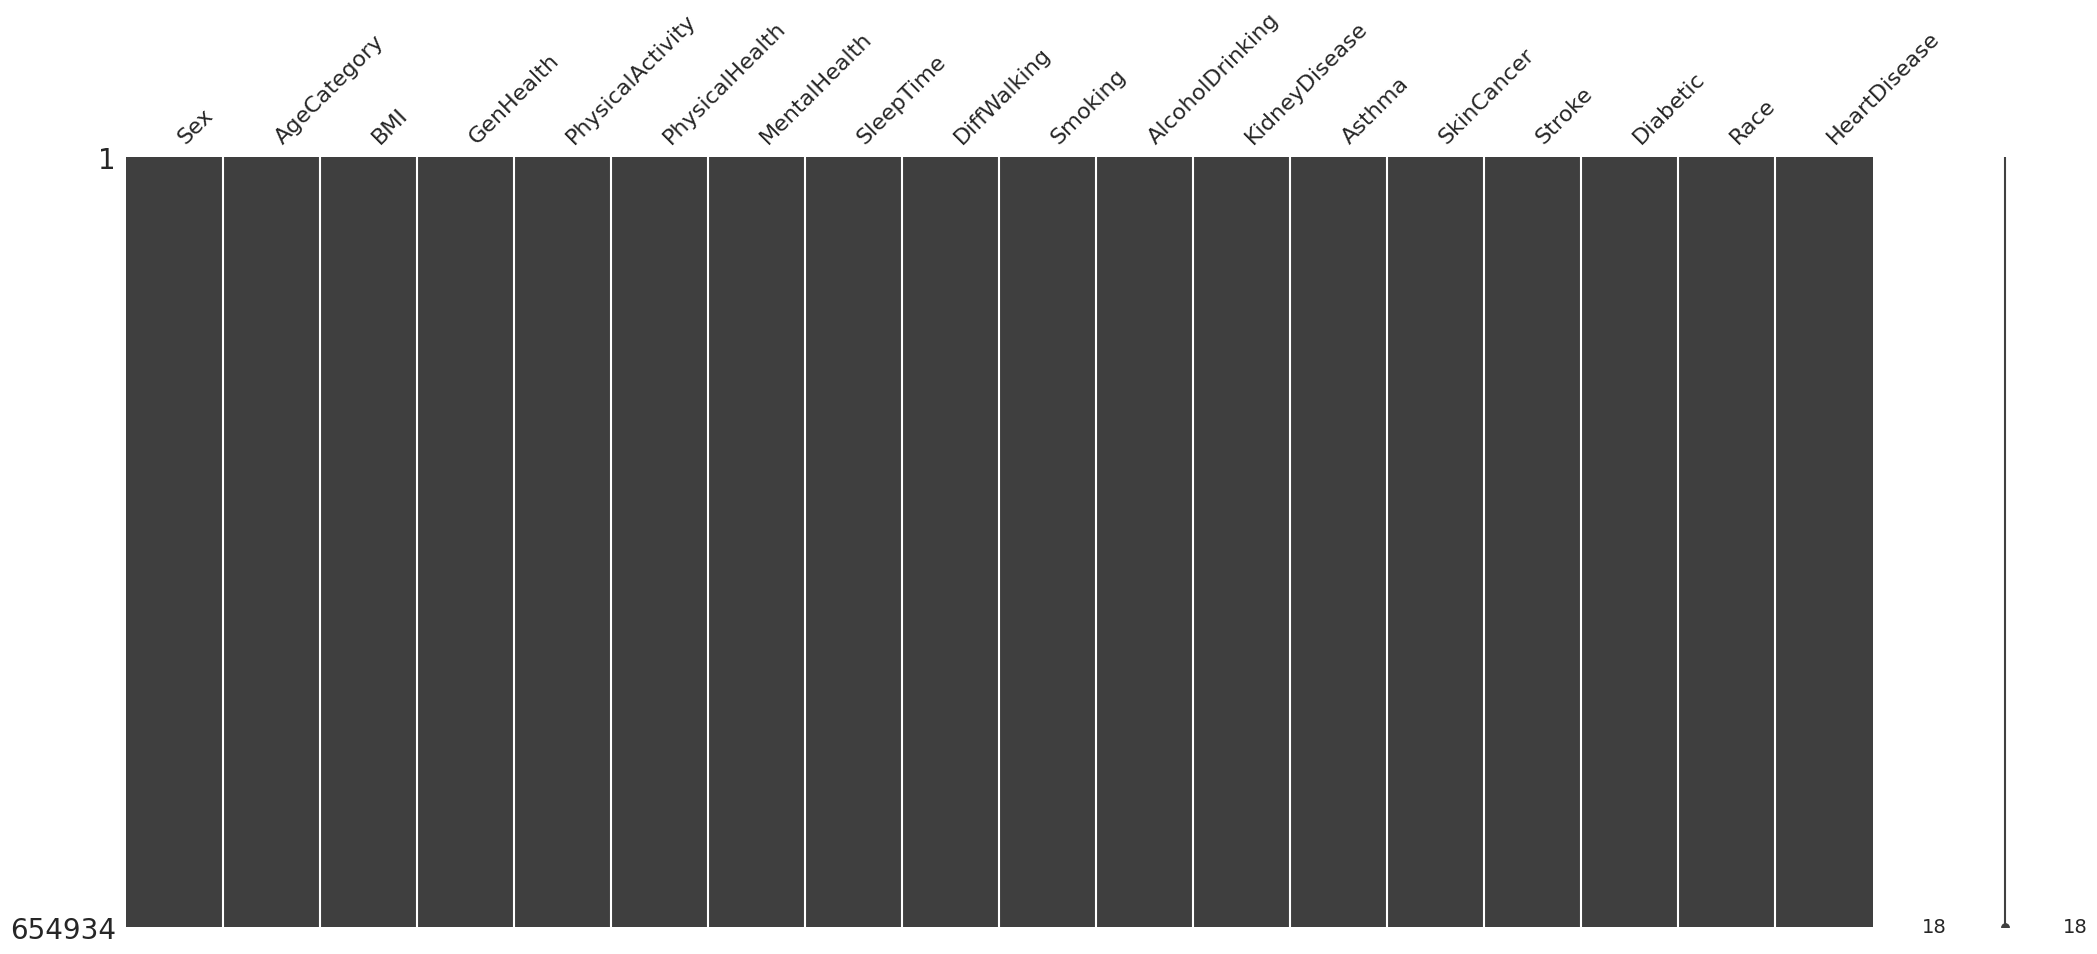

In [12]:
#viz missing
msno.matrix(df)
plt.show()

### Removing Duplicated Values

In [13]:
#check duplicate
df.duplicated().any()

True

In [14]:
df = df.drop_duplicates()
df.duplicated().any()

False

### Cleaning Categorical Attributes

In [15]:
unique_values = df['Race'].value_counts()
print(unique_values)

Race
White only, Non-Hispanic          243997
White                             227724
Hispanic                           58222
Black only, Non-Hispanic           25385
Black                              22810
Other race only, Non-Hispanic      16903
Other                              10891
Asian                               7993
Multiracial, Non-Hispanic           7602
American Indian/Alaskan Native      5192
Name: count, dtype: int64


In [16]:
# Define the mapping for renaming
mapping = {'White only, Non-Hispanic': 'White', 'Black only, Non-Hispanic': 'Black','Other race only, Non-Hispanic':'Other'}

# Replace values in the 'Race' column
df['Race'] = df['Race'].replace(mapping)

In [17]:
unique_values = df['Race'].value_counts()
print(unique_values)

Race
White                             471721
Hispanic                           58222
Black                              48195
Other                              27794
Asian                               7993
Multiracial, Non-Hispanic           7602
American Indian/Alaskan Native      5192
Name: count, dtype: int64


In [18]:
unique_values = df['AgeCategory'].value_counts()
print(unique_values)

AgeCategory
Age 65 to 69       35076
Age 60 to 64       32956
Age 70 to 74       32543
65-69              31670
60-64              31219
70-74              29273
55-59              27610
Age 55 to 59       27470
Age 80 or older    25436
Age 50 to 54       25187
Age 75 to 79       24171
50-54              23736
80 or older        23352
Age 40 to 44       22619
Age 45 to 49       21452
Age 35 to 39       21418
75-79              20713
Age 18 to 24       20708
45-49              20518
18-24              19998
40-44              19837
35-39              19526
Age 30 to 34       19187
30-34              17953
Age 25 to 29       16779
25-29              16312
Name: count, dtype: int64


In [19]:
# Replace 'to' with '-' in 'AgeCategory' column
df['AgeCategory'] = df['AgeCategory'].str.replace(' to ', '-')

# Verify the changes
print(df['AgeCategory'].value_counts())

AgeCategory
Age 65-69          35076
Age 60-64          32956
Age 70-74          32543
65-69              31670
60-64              31219
70-74              29273
55-59              27610
Age 55-59          27470
Age 80 or older    25436
Age 50-54          25187
Age 75-79          24171
50-54              23736
80 or older        23352
Age 40-44          22619
Age 45-49          21452
Age 35-39          21418
75-79              20713
Age 18-24          20708
45-49              20518
18-24              19998
40-44              19837
35-39              19526
Age 30-34          19187
30-34              17953
Age 25-29          16779
25-29              16312
Name: count, dtype: int64


In [20]:
# Remove prefix 'Age' from 'AgeCategory' column
df['AgeCategory'] = df['AgeCategory'].str.replace('Age ', '')

In [21]:
df.describe(include='object')

,Sex,AgeCategory,GenHealth,PhysicalActivity,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
count,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719
unique,2,13,5,2,2,6,2,2,2,2,2,6,7,2
top,Female,65-69,Very good,Yes,No,Never smoked,No,No,No,No,No,No,White,No
freq,327512,66746,216345,479969,532388,193470,428773,599870,533883,569844,600775,521320,471721,580929


In [22]:
# Define replacements
replacements = {
    'Yes, but only during pregnancy (female)': 'Yes (during pregnancy)',
    'No, pre-diabetes or borderline diabetes': 'No, borderline diabetes'
}

# Replace specified values in the 'Diabetic' column
df['Diabetic'].replace(replacements, inplace=True)

In [23]:
# Iterate over categorical columns, print column name, and display unique values

for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('*'*60 )

Column Name:  Sex
['Female' 'Male']
************************************************************
Column Name:  AgeCategory
['80 or older' '55-59' '40-44' '70-74' '65-69' '60-64' '75-79' '50-54'
 '45-49' '35-39' '30-34' '25-29' '18-24']
************************************************************
Column Name:  GenHealth
['Excellent' 'Very good' 'Fair' 'Poor' 'Good']
************************************************************
Column Name:  PhysicalActivity
['No' 'Yes']
************************************************************
Column Name:  DiffWalking
['No' 'Yes']
************************************************************
Column Name:  Smoking
['Never smoked' 'Former smoker' 'Current smoker - now smokes some days'
 'Current smoker - now smokes every day' 'Yes' 'No']
************************************************************
Column Name:  AlcoholDrinking
['No' 'Yes']
************************************************************
Column Name:  KidneyDisease
['No' 'Yes']
*************

<a id="2"></a>


# <p> <center style="background-color:#b84848;font-family:Gabriola;color:white;font-size:200%;text-align:center;border-radius:0px">3. Exploratory Data Analysis</center></p>

### Target Variable is Very imbalanced

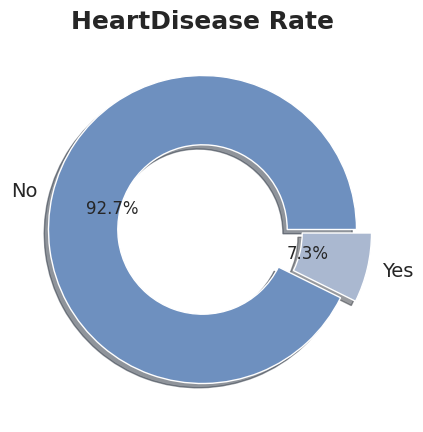

In [24]:
# Plotting the distribution
plt.figure(figsize=(5,5))
HeartDisease_rate = df["HeartDisease"].value_counts()
plt.pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
        wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1], )
plt.title("HeartDisease Rate", fontsize = 18, weight='bold')

plt.show();

### HeartDisease Among Different Gender 

In [25]:
gender_count = df['Sex'].value_counts()
gender_count

Sex
Female    327512
Male      299207
Name: count, dtype: int64

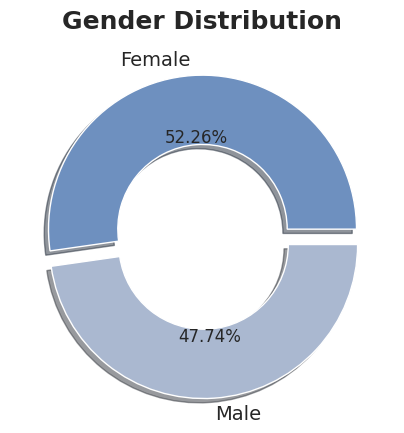

In [26]:
plt.figure(figsize=(5,5))
plt.title("Gender Distribution", fontsize = 18, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%',
       wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])

plt.show()

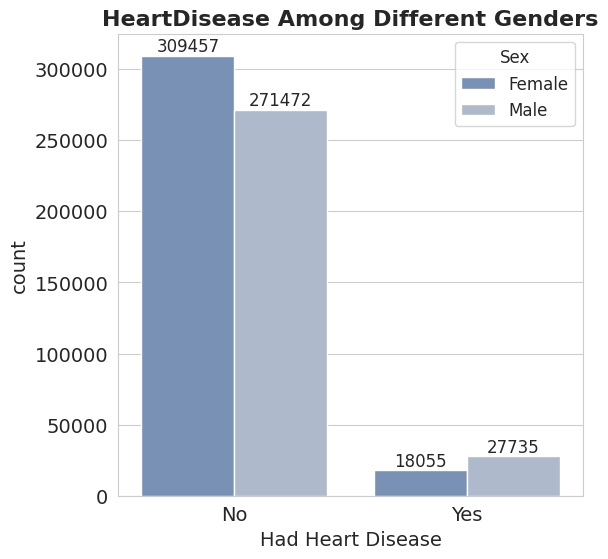

In [27]:
plt.figure(figsize=(6, 6))

ax = sns.countplot(data=df, x='HeartDisease', hue='Sex')

ax.set_title("HeartDisease Among Different Genders", fontsize=16,  weight='bold')
ax.set_xlabel("Had Heart Disease", fontsize=14)
ax.set_ylabel("count", fontsize=14)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)
# Show plot
plt.show()

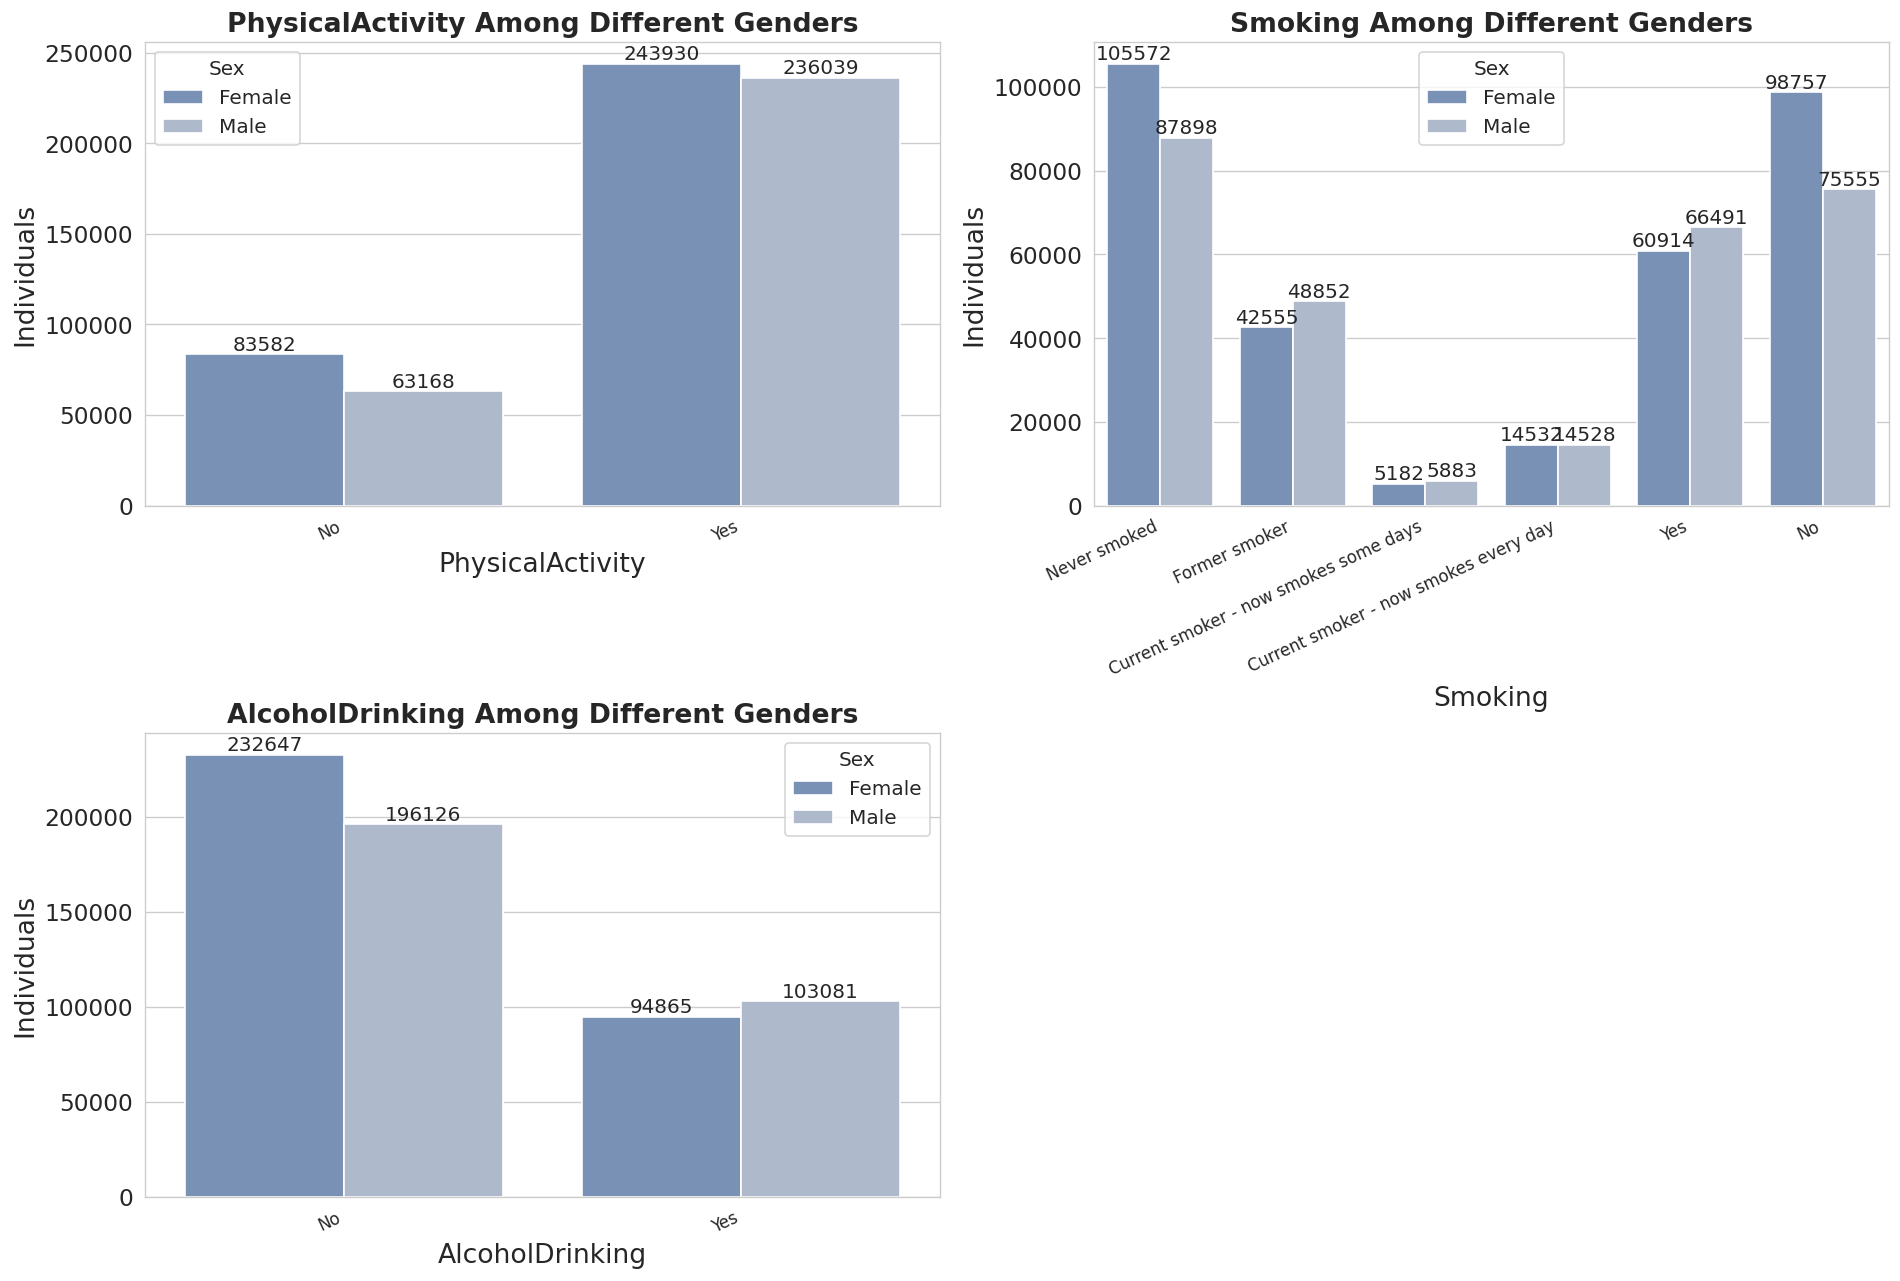

In [28]:
plt.figure(figsize=(16, 16), dpi = 120)
risk_factors = ['PhysicalActivity', 'Smoking', 'AlcoholDrinking']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    x = sns.countplot(data=df, x=risk_factor, hue='Sex')
    plt.title(f"{risk_factor} Among Different Genders", fontsize=16, weight='bold')
    plt.xlabel(risk_factor, fontsize=16)
    plt.ylabel("Individuals", fontsize=16)
    plt.xticks(size=10,rotation=25, horizontalalignment='right',fontweight='light')
    for c in x.containers:
        x.bar_label(c)
        

plt.tight_layout()
plt.show()

### HeartDisease Among Different Age Groups

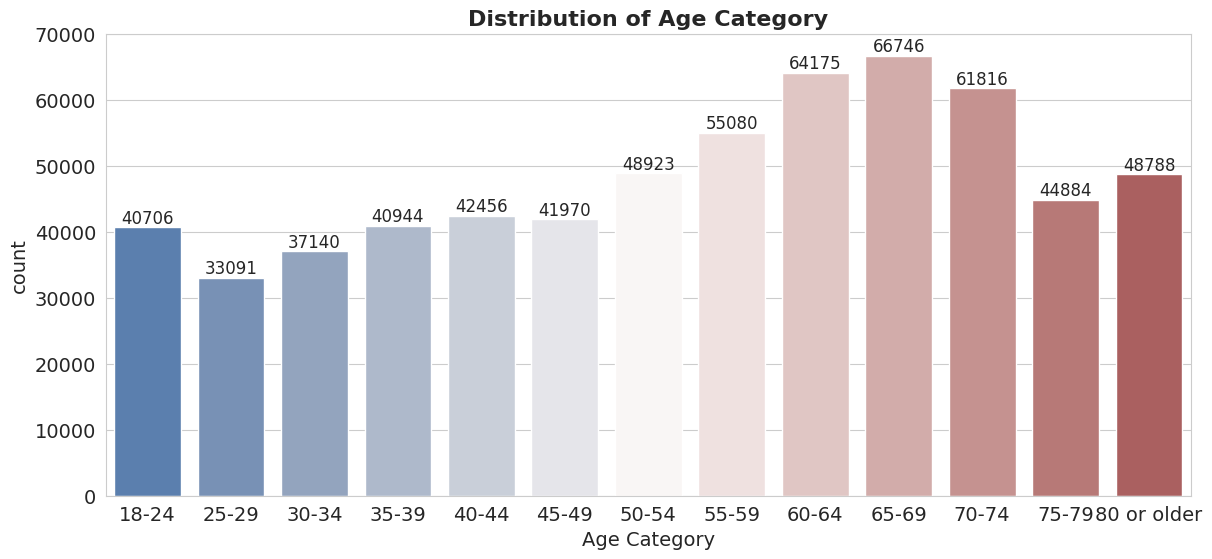

In [29]:
# Remove prefix 'Age' from 'AgeCategory' column
df['AgeCategory'] = df['AgeCategory'].str.replace('Age ', '')

# Set figure size and style
plt.figure(figsize=(14, 6))

# Plot countplot
ax = sns.countplot(data=df, x='AgeCategory', palette = 'vlag',
                   order = df['AgeCategory'].value_counts().sort_index().index.values)

# Customize plot
ax.set_title('Distribution of Age Category', fontsize=16, weight='bold')
ax.set_xlabel('Age Category', fontsize=14)
ax.set_ylabel('count', fontsize=14)
ax.tick_params(axis='x', rotation=0)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

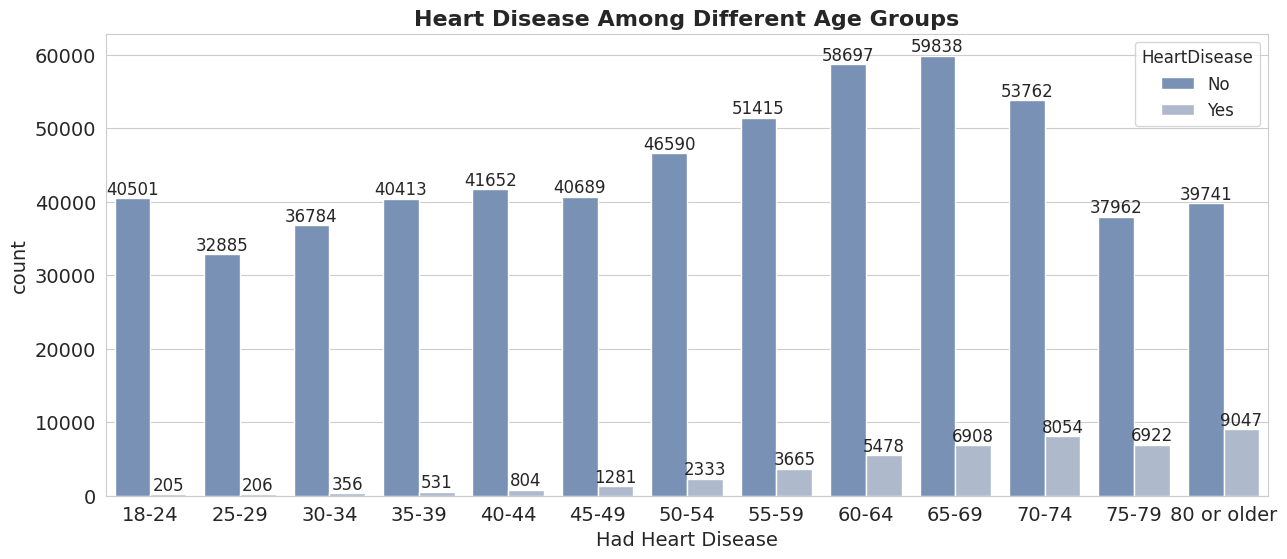

In [30]:
# Set figure size and style
plt.figure(figsize=(15, 6))

# Plot countplot
ax = sns.countplot(data=df, x='AgeCategory', hue='HeartDisease',
                   order = df['AgeCategory'].value_counts().sort_index().index.values)

# Customize plot
ax.set_title("Heart Disease Among Different Age Groups", fontsize=16, weight='bold')
ax.set_xlabel("Had Heart Disease", fontsize=14)
ax.set_ylabel("count", fontsize=14)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

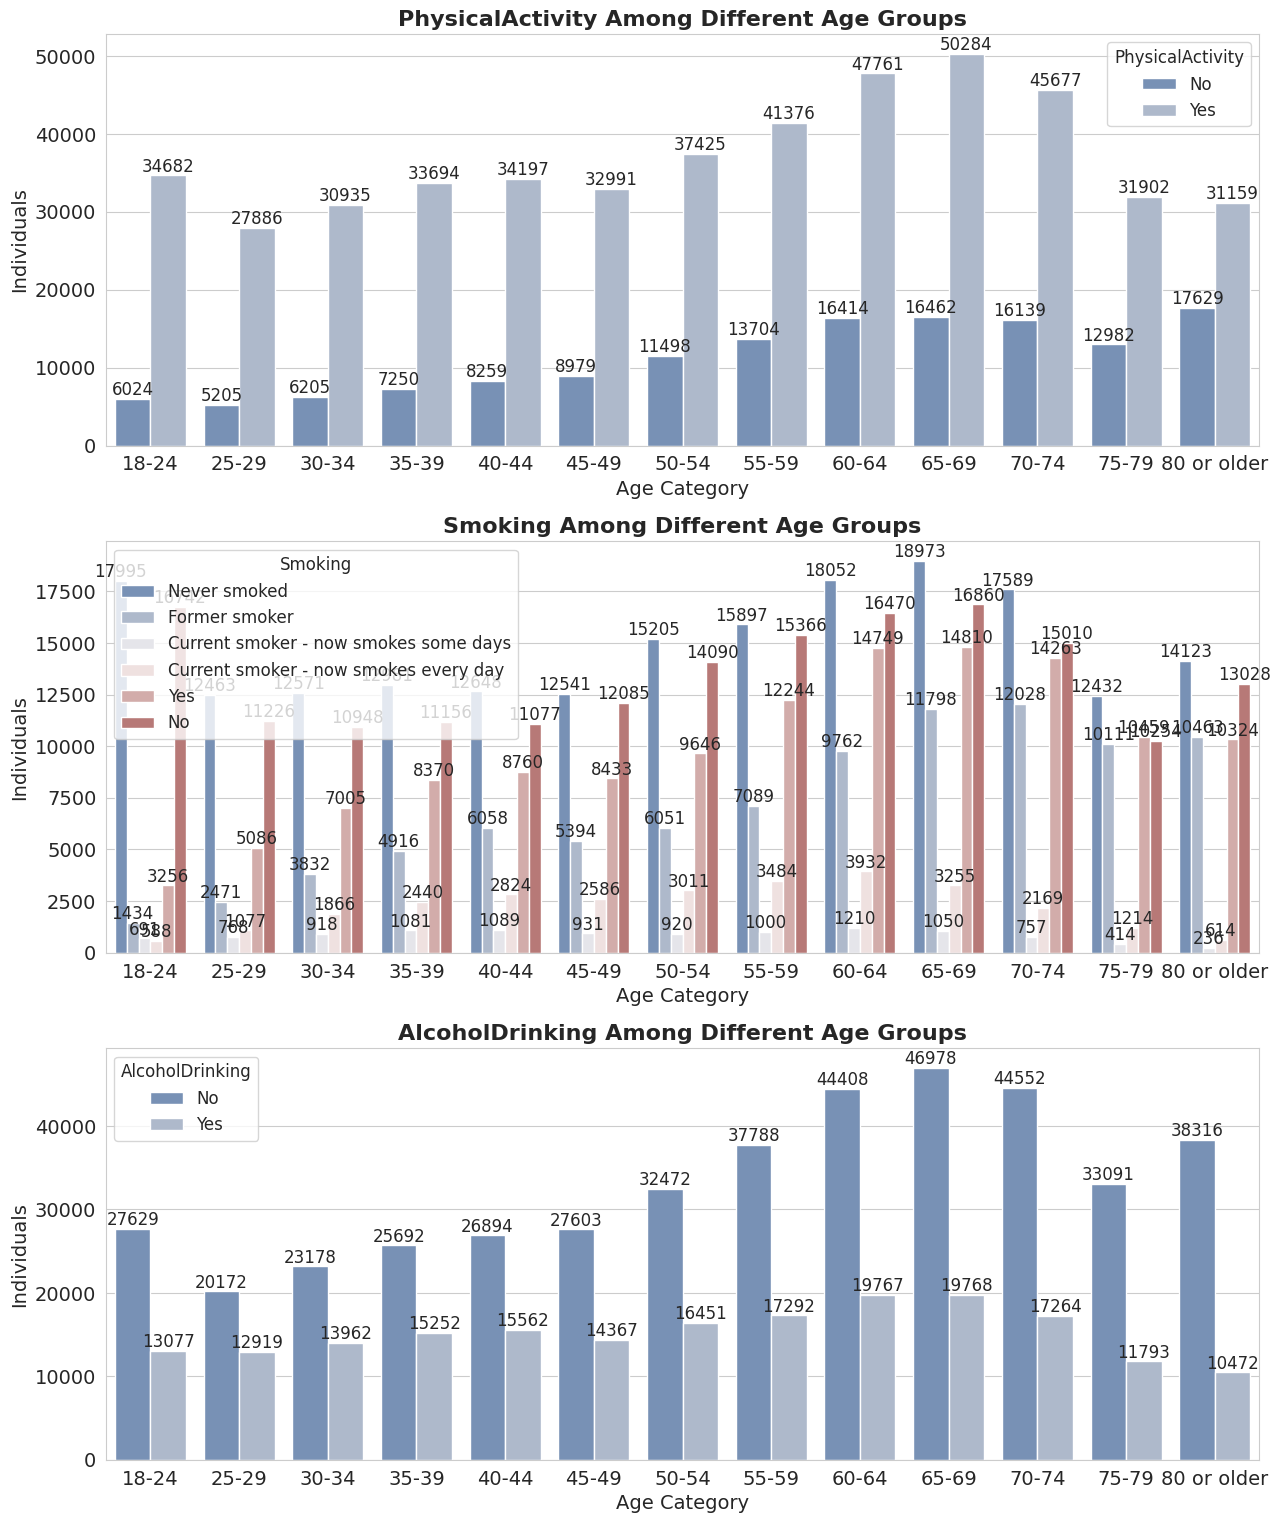

In [31]:
#  display the distribution of risk factors among different age groups
plt.figure(figsize=(13, 25))
risk_factors = ['PhysicalActivity' ,'Smoking','AlcoholDrinking']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(5, 1, i)
    x = sns.countplot(data=df, x='AgeCategory', hue=risk_factor,
                     order = df['AgeCategory'].value_counts().sort_index().index.values)
    plt.title(f"{risk_factor} Among Different Age Groups", fontsize=16, weight='bold')
    plt.xlabel("Age Category", fontsize=14)
    plt.ylabel("Individuals", fontsize=14)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()

plt.show()

### Diabetic

In [32]:
# How Many Individuals in the Dataset are Diabetic¶
df["Diabetic"].value_counts()

Diabetic
No                         521320
Yes                         85659
No, borderline diabetes     14392
Yes (during pregnancy)       5348
Name: count, dtype: int64

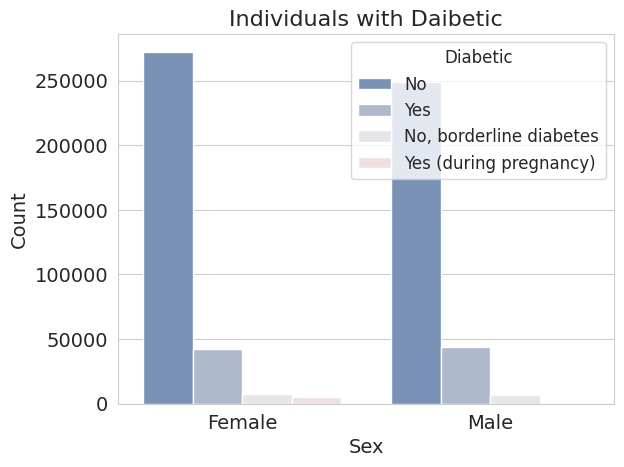

In [33]:
sns.countplot(x = "Sex", hue="Diabetic", data= df)
plt.title("Individuals with Daibetic")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show();

### Smoke 

In [34]:
df["Smoking"].unique()

array(['Never smoked', 'Former smoker',
       'Current smoker - now smokes some days',
       'Current smoker - now smokes every day', 'Yes', 'No'], dtype=object)

In [35]:
# Define replacements
replacements = {
    'Never smoked': 'No',
    'Former smoker': 'No',
    'Current smoker - now smokes some days': 'Yes',
    'Current smoker - now smokes every day': 'Yes'
}

# Replace specified values in the 'Diabetic' column
df['Smoking'].replace(replacements, inplace=True)

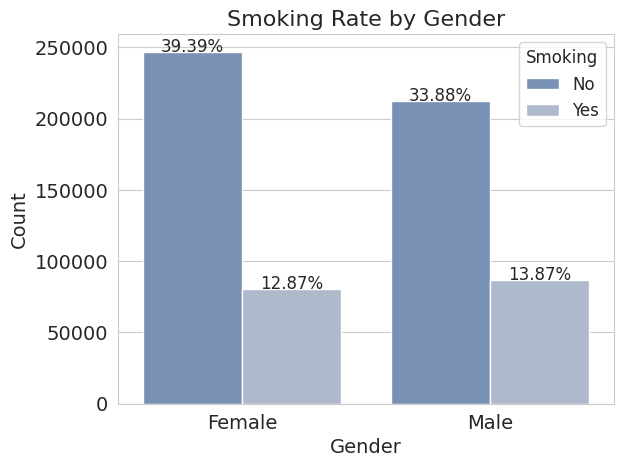

In [36]:
# Create countplot
ax = sns.countplot(x="Sex", hue="Smoking", data=df)

# Add percentages on top of each bar
total = len(df)  # total number of observations

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.2%}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Smoking Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

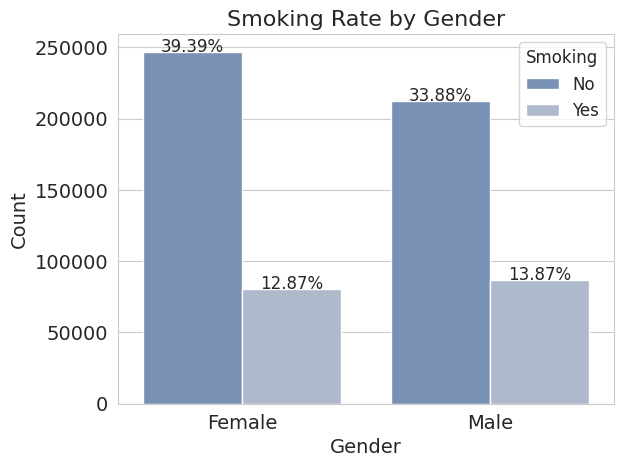

In [37]:
# Create countplot
ax = sns.countplot(x="Sex", hue="Smoking", data=df)

# Add percentages on top of each bar
total = len(df)  # total number of observations

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.2%}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Smoking Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Asthma

In [38]:
df["Asthma"].unique()

array(['No', 'Yes'], dtype=object)

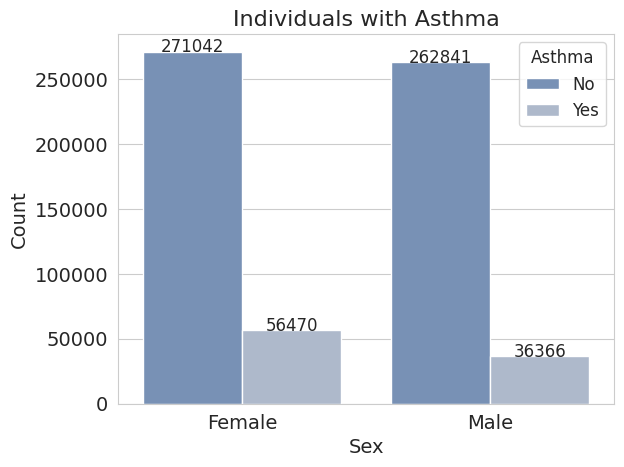

In [39]:
# Create countplot
ax = sns.countplot(x = "Sex", hue="Asthma", data= df)

# Add count values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{int(height)}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Individuals with Asthma')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### KidneyDisease

In [40]:
df['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

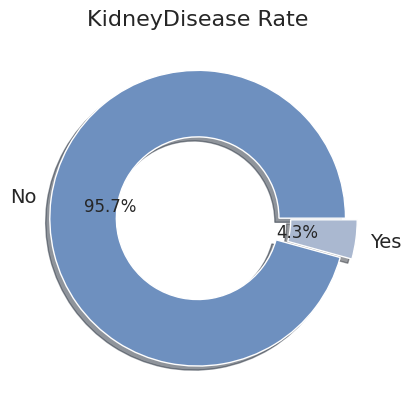

In [41]:
HeartDisease_rate = df["KidneyDisease"].value_counts()
plt.pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%1.1f%%",
        wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode=[0, 0.08])
plt.title("KidneyDisease Rate")
plt.show();

### Numerical Variables

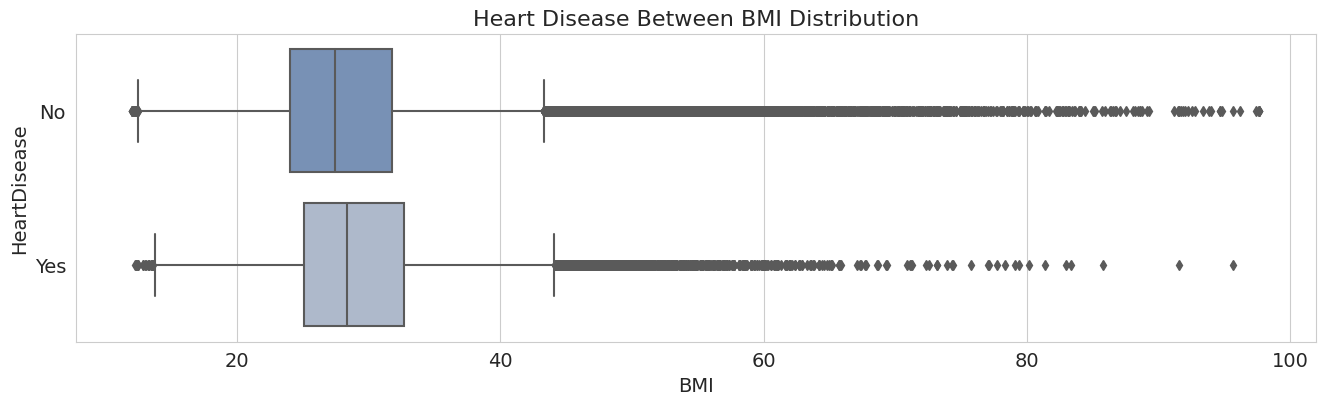

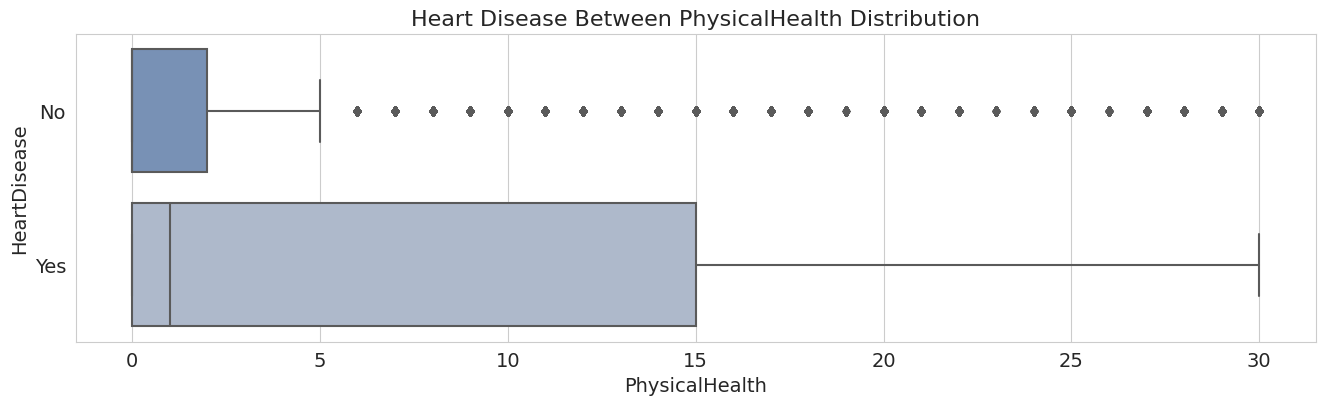

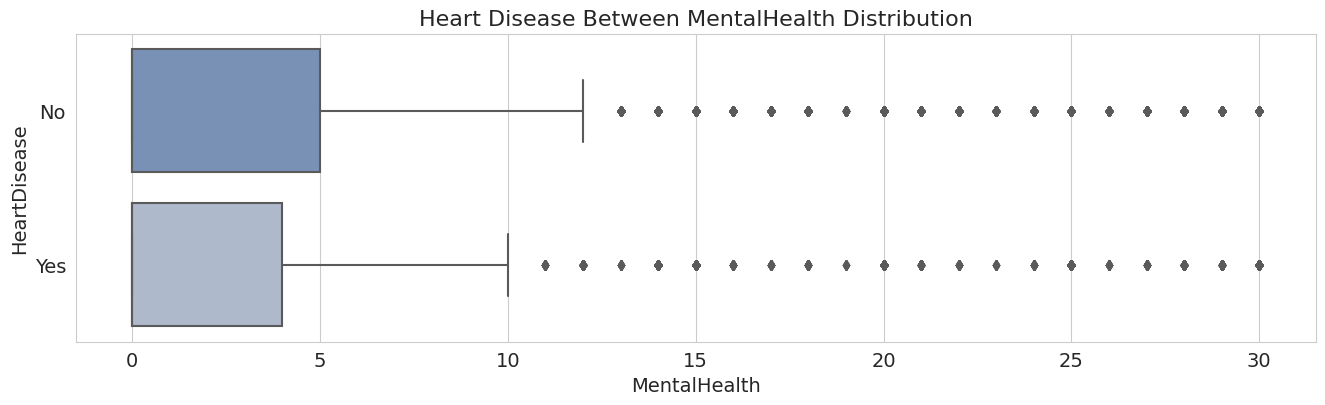

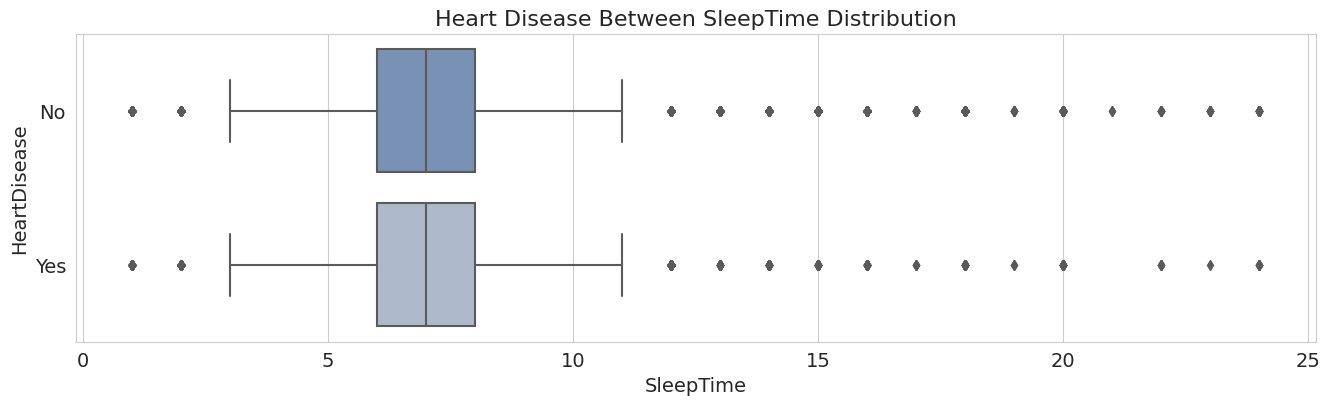

In [42]:
for col in df.describe().columns:
    plt.figure(figsize=(16, 4))
    sns.boxplot(data=df, x=col, y='HeartDisease')
    plt.title(f'Heart Disease Between {col} Distribution')
    plt.show()

In [43]:
def get_outliers(df, column):
    # Calculate quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Extract outliers
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    
    return outliers, lower_limit, upper_limit


In [44]:
sleep_hours_outliers, lower_sleep, upper_sleep = get_outliers(df, 'SleepTime')
print(f"Lower Limit:{lower_sleep})\nUpper Limit:{upper_sleep})")

Lower Limit:3.0)
Upper Limit:11.0)


In [45]:
def drop_outliers(dataframe, columns):
    new_df = dataframe.copy()  # Create a copy of the original DataFrame
    for column in columns:
        # Calculate quartiles
        Q1 = new_df[column].quantile(0.25)
        Q3 = new_df[column].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Drop outliers
        dataframe = new_df[(new_df[column] >= lower_limit) & (new_df[column] <= upper_limit)]
    
    return dataframe

In [46]:
# List of columns to check for outliers
columns_to_check = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI',]

# Call the function to drop outliers from specified columns
df = drop_outliers(df, columns_to_check)

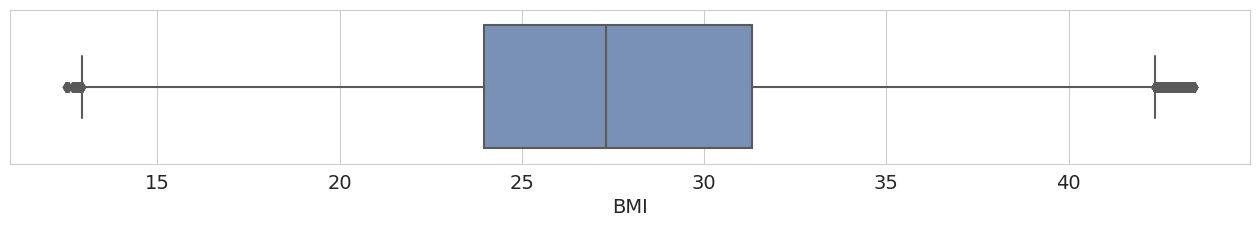

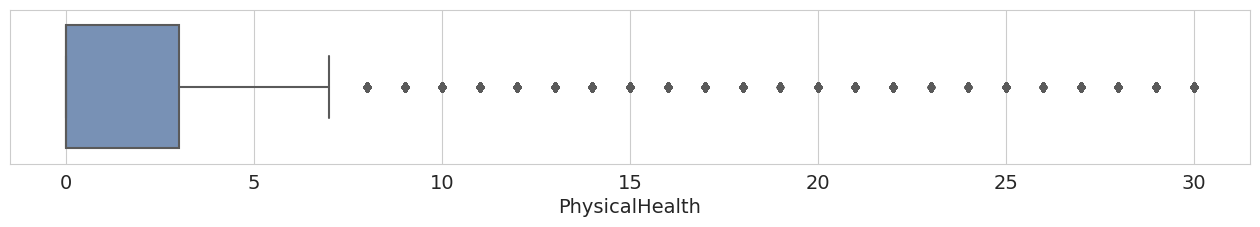

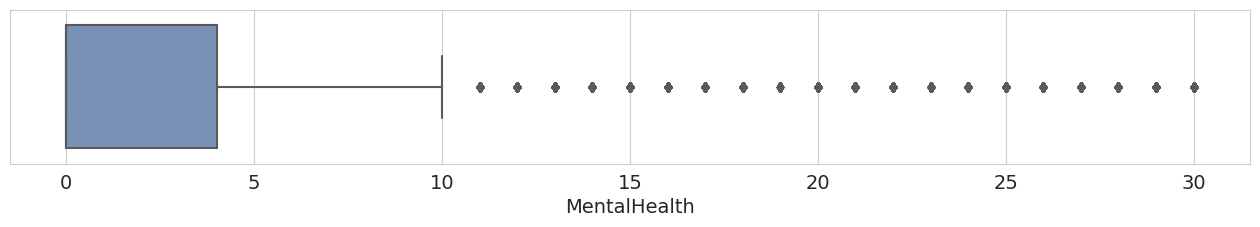

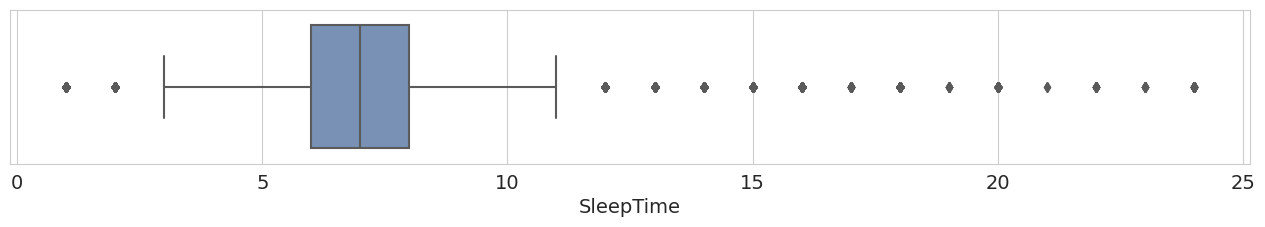

In [47]:
for col in df.describe().columns:
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=df, x=col)
    plt.show()

**later decided not to remove outliers as they were true values**

<a id="4"></a>

# <p> <center style="background-color:#b84848;font-family:Gabriola;color:white;font-size:200%;text-align:center;border-radius:0px">4. Preprocessing Pipelines</center></p>


### **Splitting into Train-Set 70%, Validation-Set 10%, Test-Set 20%.**

In [48]:
from sklearn.model_selection import train_test_split
temp, test = train_test_split(df, test_size = 0.2, random_state = 42,
                                      stratify=df['HeartDisease'])

train, val = train_test_split(temp, test_size = 0.125, random_state = 42,
                                      stratify=temp['HeartDisease'])

train = train.reset_index(drop = True)
val = val.reset_index(drop = True)
test = test.reset_index(drop = True)

print(train.shape, val.shape, test.shape)
print(round((100*train.shape[0]/df.shape[0]), 2),
      round((100*val.shape[0]/df.shape[0]), 2),
      round((100*test.shape[0]/df.shape[0]), 2))

(425826, 18) (60833, 18) (121665, 18)
70.0 10.0 20.0


In [49]:
X_train, y_train = train.drop(columns = 'HeartDisease'), train['HeartDisease']
X_val, y_val = val.drop(columns = 'HeartDisease'), val['HeartDisease']
X_test, y_test = test.drop(columns = 'HeartDisease'), test['HeartDisease']

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(425826, 17) (425826,)
(60833, 17) (60833,)
(121665, 17) (121665,)


In [50]:
num_attris = X_train.select_dtypes(np.number).columns
cat_attris = X_train.select_dtypes(object).columns

### **Implementing an Ordinal Encoder**

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

class OrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, random_state = 42):
        self.random_state = random_state
        
    def fit(self, X, y = None):
        self.encoding = { 
            'Sex' : dict(zip(['Female', 'Male'], [0, 1])),
            'GenHealth' : dict(zip(['Poor', 'Fair', 'Good',
                                    'Very good', 'Excellent'], range(5))),
            'PhysicalActivity' : dict(zip(['No', 'Yes'], [0, 1])),
            'Stroke' : dict(zip(['No', 'Yes'], [0, 1])),
            'Asthma' :  dict(zip(['No', 'Yes'], [0, 1])),
            'SkinCancer' :  dict(zip(['No', 'Yes'], [0, 1])),
            'Diabetic' : dict(zip(['No',  'No, borderline diabetes',
                                   'Yes (during pregnancy)','Yes'], range(4))),
            'AlcoholDrinking' : dict(zip(['No', 'Yes'], [0, 1])),
            'AgeCategory' : dict(zip(['18-24', '25-29', '30-34', '35-39',
                                        '40-44', '45-49', '50-54', '55-59',
                                        '60-64', '65-69', '70-74', '75-79',
                                        '80 or older'], range(14))),

            'KidneyDisease' : dict(zip(['No', 'Yes'], [0, 1])),
            'Smoking' : dict(zip(['Never smoked', 'No', 'Former smoker', 'Yes',
                                  'Current smoker - now smokes some days',
                                  'Current smoker - now smokes every day',
                                  ], range(10))),

            'DiffWalking' :  dict(zip(['No', 'Yes'], [0, 1])),
                   }
        self.feature_names = X.columns
        
        return self
    
    def transform(self, X):
        X_ = X.copy()
        for col in self.encoding.keys():
            X_[col] = X_[col].map(self.encoding[col])
            X_[col] = X_[col].astype('int')
        return X_
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names_out(self, names = None):
        return self.feature_names
    
    
encoder = OrdinalEncoder()
encoder.fit_transform(X_train[cat_attris]).head()

,Sex,AgeCategory,GenHealth,PhysicalActivity,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race
0,0,8,0,0,1,3,0,0,1,0,0,0,White
1,0,2,1,1,0,1,0,0,0,0,0,0,White
2,1,4,4,1,0,1,0,0,0,0,0,0,White
3,0,3,4,1,0,3,0,0,0,0,0,0,White
4,1,5,2,1,0,1,0,0,0,0,0,0,Hispanic


### trying the best transfomation for skewed numerical attributes 

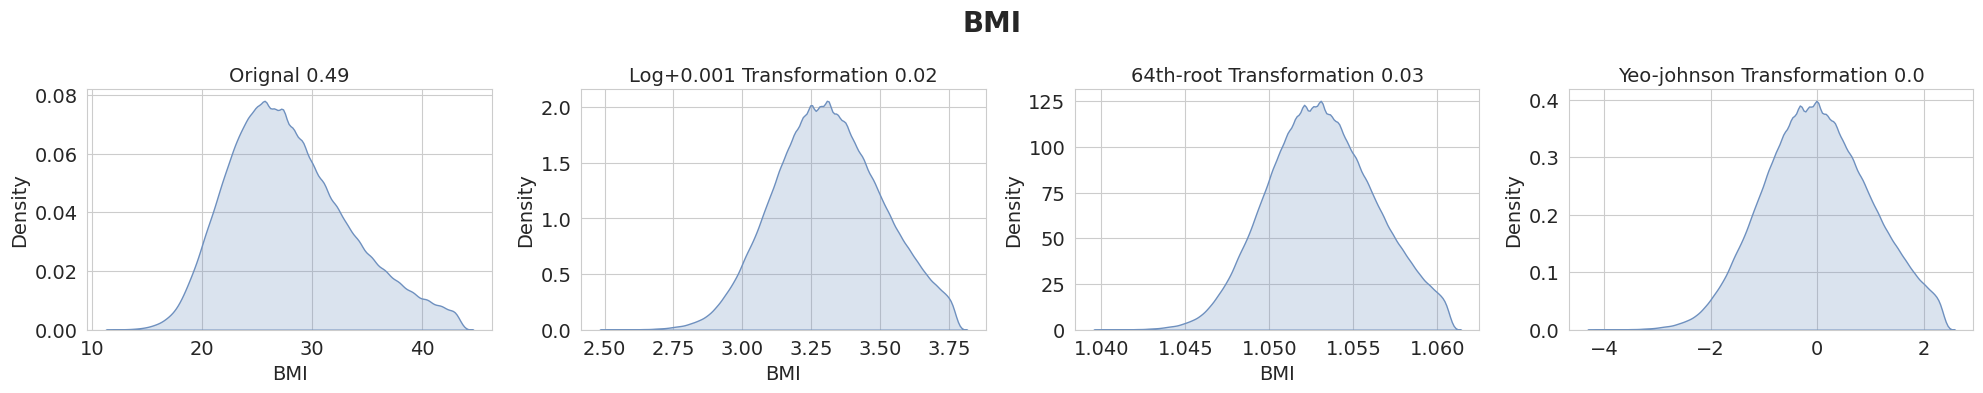

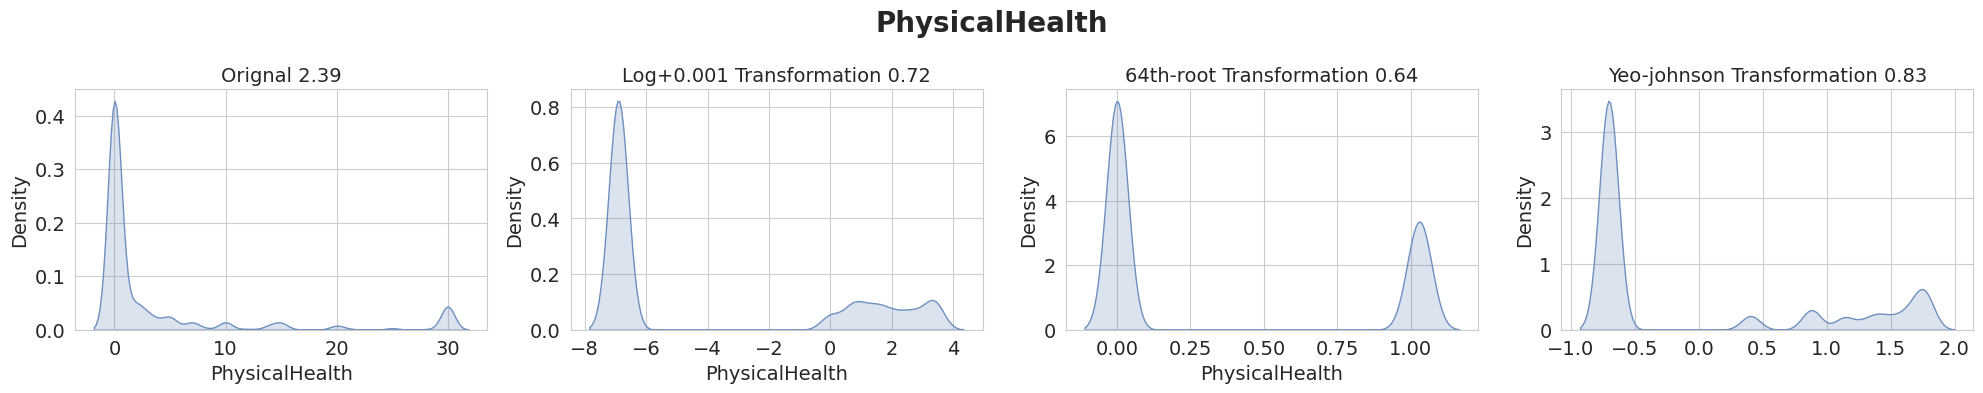

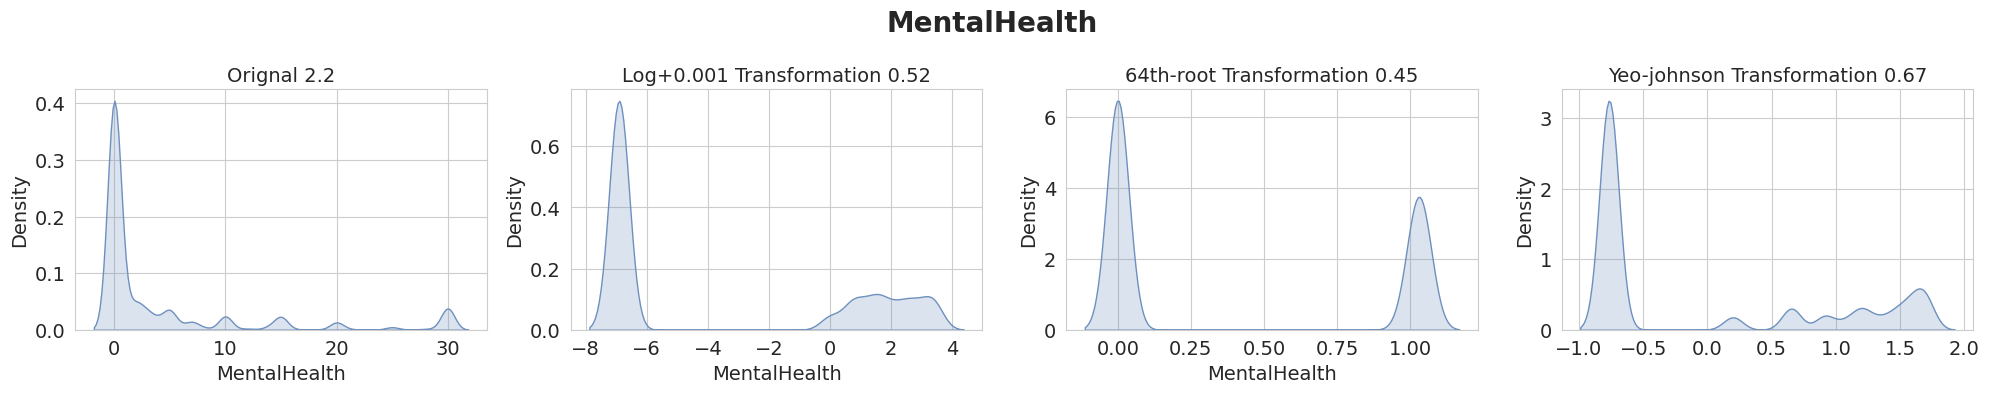

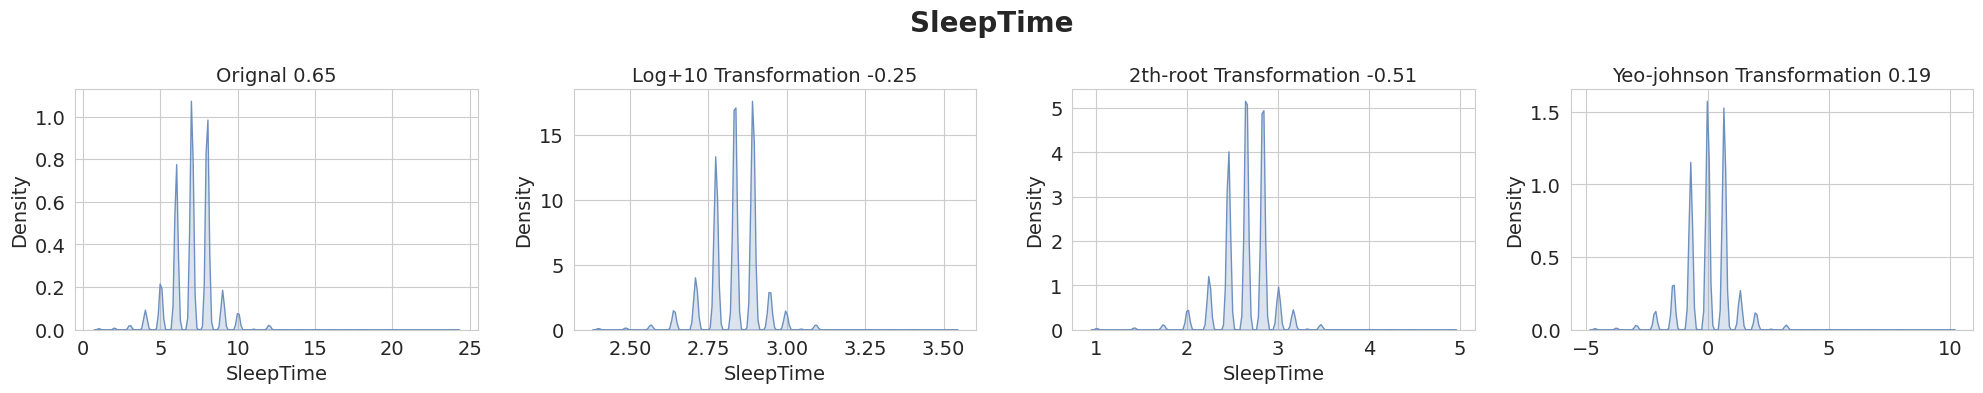

In [52]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

for attr in num_attris:
    fig, ax = plt.subplots(1, 4, figsize=(20,4))

    skf = X_train[attr].skew().round(2)
    sns.kdeplot(X_train[attr], fill = True, ax=ax[0])
    ax[0].set_title(f'Orignal {skf}', fontsize=14)

    
    gridsv, x, skf = [0.001, 1, 10, 100, 1000, 10000], 0.001, 200
    for i in gridsv:
        n_skf = skew(np.log(i+X_train[attr]))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf    
            
    log_bmi = np.log(x+X_train[attr])
    skf = round( skew(log_bmi), 2)
    sns.kdeplot(log_bmi, fill = True, ax=ax[1])
    ax[1].set_title(f'Log+{x} Transformation {skf}', fontsize=14)


    gridsv, x, skf = [1/2, 1/4, 1/8, 1/16, 1/32, 1/64], 1/2, 200
    for i in gridsv:
        n_skf = skew(np.power(X_train[attr], i))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf  

    sqrt_bmi = np.power(X_train[attr], x)
    sns.kdeplot(sqrt_bmi, fill = True, ax=ax[2])
    skf = round(skew(sqrt_bmi), 2)
    ax[2].set_title(f'{int(1/x)}th-root Transformation {skf}', fontsize=14)

    transformer = PowerTransformer()
    yeo_bmi = transformer.fit_transform((X_train[[attr]]+1))[:,  0]
    skf = round(skew(yeo_bmi), 2)
    sns.kdeplot(yeo_bmi, fill = True, ax=ax[3])
    ax[3].set_title(f'Yeo-johnson Transformation {skf}', fontsize=14)
    

    plt.suptitle(attr, fontsize=20, weight='bold')
    plt.tight_layout(pad=1.1)
    plt.show()

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ['SleepTime', 'BMI']
num_pipeline0 = Pipeline([
    ('transform', PowerTransformer()),
    ('scale',StandardScaler()) ])
num_pipeline0

Pipeline(steps=[('transform', PowerTransformer()), ('scale', StandardScaler())])

In [54]:
class NRootTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n = 1/2, random_state = 42):
        self.random_state = random_state
        self.n = n
        
    def fit(self, X, y = None):
        self.feature_names = X.columns
        return self
    
    def transform(self, X):
        return np.power(X, self.n)
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names_out(self, names = None):
        return self.feature_names
    
    
transformer = NRootTransformer(n = 1/32)
transformer.fit_transform(X_train[['PhysicalHealth', 'MentalHealth']]).head()

,PhysicalHealth,MentalHealth
0,1.112141,1.074608
1,0.000000,1.112141
2,0.000000,0.000000
3,0.000000,1.021897
4,0.000000,0.000000


In [55]:
# ['PhysicalHealth', 'MentalHealth']
num_pipeline1 = Pipeline([
    ('transform', NRootTransformer(n = 1/32)),
    ('scale',StandardScaler()) ])
num_pipeline1


Pipeline(steps=[('transform', NRootTransformer(n=0.03125)),
                ('scale', StandardScaler())])

In [56]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder


ord_cat_attris = ['Sex', 'GenHealth', 'PhysicalActivity', 'Stroke', 'Asthma',
               'SkinCancer', 'Diabetic', 'AlcoholDrinking', 'AgeCategory',
               'KidneyDisease', 'Smoking', 'DiffWalking']

preprocessing_pipeline = ColumnTransformer([
    ('num_pipeline0', num_pipeline0, ['BMI', 'SleepTime']),
    ('num_pipeline1', num_pipeline1, ['PhysicalHealth', 'MentalHealth']),
    ('ord_pipeline', OrdinalEncoder(), ord_cat_attris),
    ('drop', 'drop', ['Race']),
                                ],
    remainder = "drop")

preprocessing_pipeline

ColumnTransformer(transformers=[('num_pipeline0',
                                 Pipeline(steps=[('transform',
                                                  PowerTransformer()),
                                                 ('scale', StandardScaler())]),
                                 ['BMI', 'SleepTime']),
                                ('num_pipeline1',
                                 Pipeline(steps=[('transform',
                                                  NRootTransformer(n=0.03125)),
                                                 ('scale', StandardScaler())]),
                                 ['PhysicalHealth', 'MentalHealth']),
                                ('ord_pipeline', OrdinalEncoder(),
                                 ['Sex', 'GenHealth', 'PhysicalActivity',
                                  'Stroke', 'Asthma', 'SkinCancer', 'Diabetic',
                                  'AlcoholDrinking', 'AgeCategory',
                                  'KidneyDisease', 'Smoking', 'DiffWalking']),
                                ('drop', 'drop', ['Race'])])

In [57]:
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_val_processed = preprocessing_pipeline.transform(X_val)
X_test_processed = preprocessing_pipeline.transform(X_test)

print(X_train_processed.shape)
X_train_processed[0]

(425826, 16)


array([-1.38574718, -2.17380878,  1.47304234,  1.27534846,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  8.        ,  0.        ,  3.        ,
        1.        ])

In [58]:
y_train = y_train.replace({'Yes': 1, 'No' : 0})
y_test = y_test.replace({'Yes': 1, 'No' : 0})
y_val = y_val.replace({'Yes': 1, 'No' : 0})

y_train.shape, y_test.shape, y_val.shape

((425826,), (121665,), (60833,))

<a id="3"></a>

# <p> <center style="background-color:#b84848;font-family:Gabriola;color:white;font-size:200%;text-align:center;border-radius:0px">5. Setting Baseline Performance</center></p>


In [59]:
from sklearn.linear_model import LogisticRegression

clr = LogisticRegression(max_iter=10000)
clr.fit(X_train_processed, y_train)

LogisticRegression(max_iter=10000)

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score


y_val_hat = clr.predict(X_val_processed)

under_sampling_scores = dict()
under_sampling_scores['LogisticRegressionBL'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }
print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

f1 score: 0.12128465988430083
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56413
           1       0.51      0.07      0.12      4420

    accuracy                           0.93     60833
   macro avg       0.72      0.53      0.54     60833
weighted avg       0.90      0.93      0.90     60833



### Chose F1 score as performance matrix as accuracy can be deceiving, Since Data is imbalanced

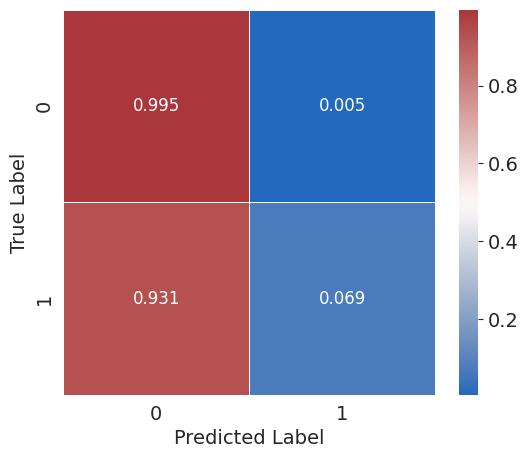

In [61]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, y_val_hat, normalize='true'),
            annot=True, fmt=".3f", linewidth=.5, cmap='vlag')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

<a id="5"></a>

# <p> <center style="background-color:#b84848;font-family:Gabriola;color:white;font-size:200%;text-align:center;border-radius:0px">6. Under-Sampling Techniques</center></p>


### Under-sampling techniques
- **Generating techniques**
    - Cluster-Centroids
- **Selection techniques Controled**
    - Random-Under-Sampling
    - Near-Miss
- **Selection techniques Cleaning**
    - Tomek-Links
    - OneSidedSelection
    - EditedNearestNeighbours
    - RepeatedEditedNearestNeighbours
    - AllKNN
    - InstanceHardnessThreshold
    - NeighbourhoodCleaningRule
- **Comibing best selection and cleaning techniques**

### RandomUnderSampler

In [62]:
def plot_sampled_vs_notsampled(y_train, y_train_sampled, title):
    print(f'instances number before sampling: {y_train.shape[0]}')
    print(f"instances number after sampling: {y_train_sampled.shape[0]}")

    print(f"minority class percentage before sampling: {round(y_train.sum()/len(y_train), 3)}")
    print(f"minority class percentage after sampling: {y_train_sampled.sum()/len(y_train_sampled)}")
    
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))
    HeartDisease_rate = y_train.map({0:'No', 1:'Yes'}).value_counts()
    ax[0].pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
             wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])
    ax[0].set_title('original')
    HeartDisease_rate = y_train_sampled.map({0:'No', 1:'Yes'}).value_counts()
    ax[1].pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
             wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])
    ax[1].set_title('under-sampled')
    plt.suptitle(title, weight = 'bold')
    plt.show();

instances number before sampling: 425826
instances number after sampling: 61878
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


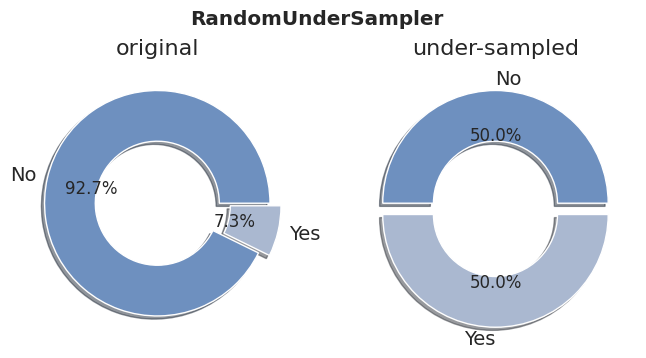

In [63]:
from imblearn.under_sampling import RandomUnderSampler

sampler  = RandomUnderSampler(sampling_strategy='majority')
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RandomUnderSampler')

In [64]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RandomUnderSampler'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.30506666666666665
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     56413
           1       0.19      0.78      0.31      4420

    accuracy                           0.74     60833
   macro avg       0.58      0.76      0.57     60833
weighted avg       0.92      0.74      0.80     60833



### ClusterCentroids

***ClusterCentroids Model takes too long to run so **We** resampled the dataset in batches***

In [65]:
n = 20
batch_size = len(X_train_processed) // n
remainder = len(X_train_processed) % n
X_batches = []
y_batches = []
idx, s = 0, 0
for i in range(n):
    batch_end = idx + batch_size + (1 if i < remainder else 0)
    X_batches.append(X_train_processed[idx:batch_end])
    y_batches.append(y_train[idx:batch_end])
    idx = batch_end
    s += X_batches[i].shape[0]
    assert X_batches[i].shape[0] == y_batches[i].shape[0]
    
assert X_train_processed.shape[0] == s
print(X_train_processed.shape[0], s, X_batches[0].shape )

425826 425826 (21292, 16)


0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 425826
instances number after sampling: 61878
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


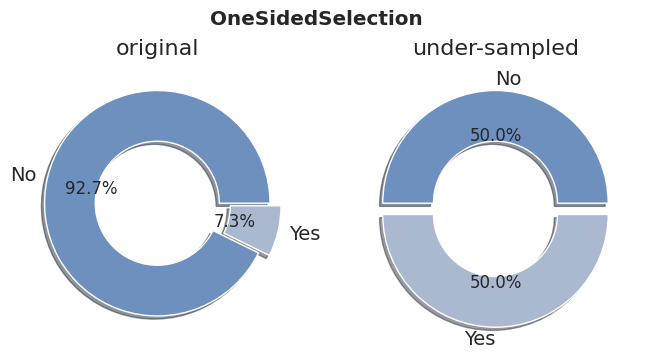

In [66]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = ClusterCentroids(sampling_strategy='majority', random_state = 42,
                           estimator = MiniBatchKMeans(n_init = 1, random_state=42, batch_size=2048))
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'OneSidedSelection')

In [67]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['ClusterCentroids'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.30533117932148623
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     56413
           1       0.19      0.77      0.31      4420

    accuracy                           0.75     60833
   macro avg       0.58      0.76      0.57     60833
weighted avg       0.92      0.75      0.81     60833



### NearMiss

Downsampling the majority 
<br>
<img src="images\nearmis.png" style="background-color:white;">

instances number before sampling: 425826
instances number after sampling: 61878
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


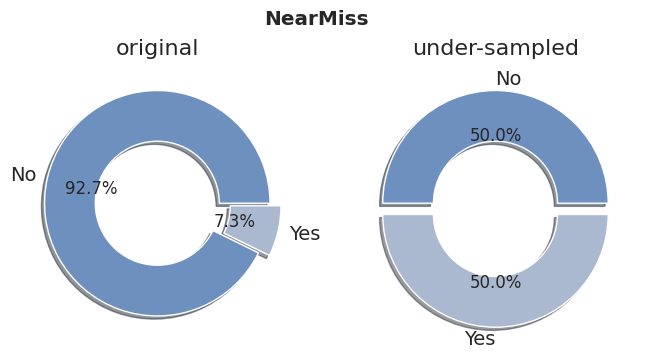

In [68]:
from imblearn.under_sampling import NearMiss

sampler = NearMiss(sampling_strategy='majority', n_neighbors=3)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)
y_train_resampled = pd.Series(y_train_resampled)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'NearMiss')

In [69]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['NearMiss'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.16392742796157952
              precision    recall  f1-score   support

           0       0.96      0.39      0.56     56413
           1       0.09      0.78      0.16      4420

    accuracy                           0.42     60833
   macro avg       0.52      0.59      0.36     60833
weighted avg       0.90      0.42      0.53     60833



### EditedNearestNeighbours

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 425826
instances number after sampling: 366555
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.0844047960060564


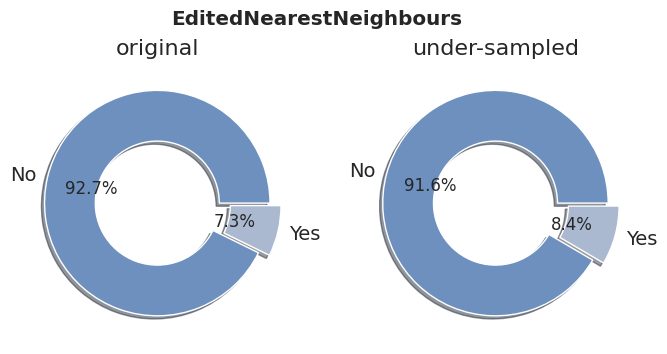

In [70]:
from imblearn.under_sampling import EditedNearestNeighbours

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'EditedNearestNeighbours')

In [71]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['EditedNearestNeighbours'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.29354151880766505
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     56413
           1       0.39      0.23      0.29      4420

    accuracy                           0.92     60833
   macro avg       0.67      0.60      0.63     60833
weighted avg       0.90      0.92      0.91     60833



### RepeatedEditedNearestNeighbours

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 425826
instances number after sampling: 340344
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.09090508426768211


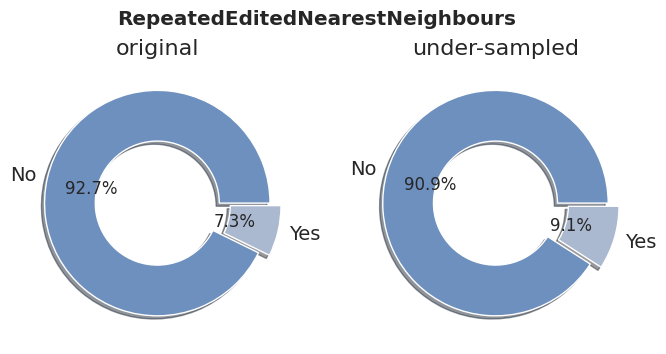

In [72]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = RepeatedEditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)

X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RepeatedEditedNearestNeighbours')

In [73]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RepeatedEditedNearestNeighbours'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.34630844087158874
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     56413
           1       0.33      0.37      0.35      4420

    accuracy                           0.90     60833
   macro avg       0.64      0.66      0.65     60833
weighted avg       0.90      0.90      0.90     60833



### TomekLinks

<img src="images\tomeklinks.png" style="background-color:white;">

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 425826
instances number after sampling: 415148
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.07452522955668822


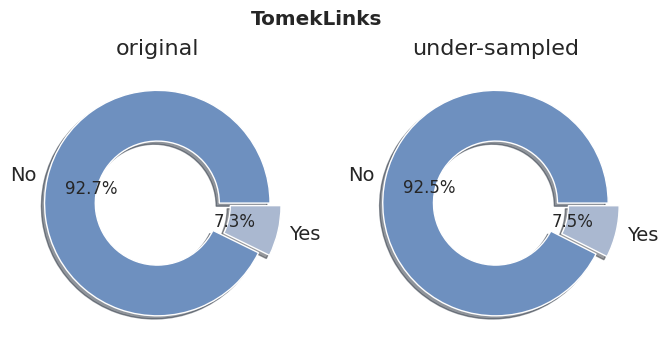

In [74]:
from imblearn.under_sampling import TomekLinks

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = TomekLinks(sampling_strategy='majority')
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'TomekLinks')

In [75]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['TomekLinks'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.1464451313755796
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56413
           1       0.50      0.09      0.15      4420

    accuracy                           0.93     60833
   macro avg       0.72      0.54      0.55     60833
weighted avg       0.90      0.93      0.90     60833



### ALLKNN

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 425826
instances number after sampling: 353900
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.0874230008476971


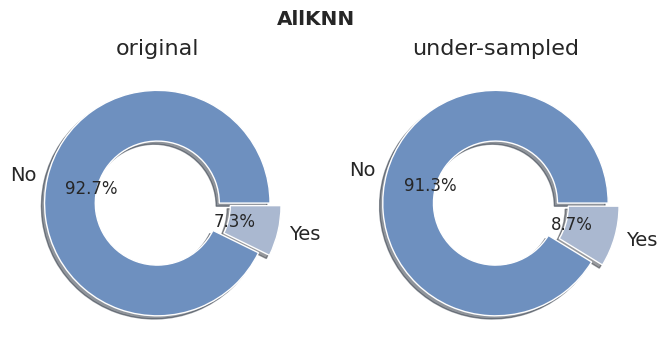

In [76]:
from imblearn.under_sampling import AllKNN

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = AllKNN(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'AllKNN')

In [77]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['AllKNN'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.32396652928687397
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     56413
           1       0.36      0.29      0.32      4420

    accuracy                           0.91     60833
   macro avg       0.65      0.63      0.64     60833
weighted avg       0.90      0.91      0.91     60833



### InstanceHardnessThreshold

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 425826
instances number after sampling: 166468
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.1858555398034457


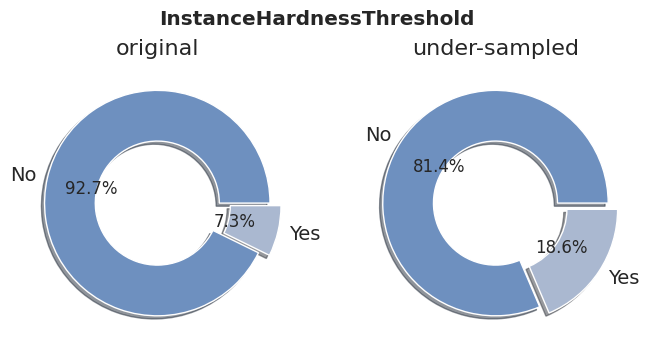

In [78]:
from imblearn.under_sampling import InstanceHardnessThreshold

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = InstanceHardnessThreshold(sampling_strategy='majority', cv=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'InstanceHardnessThreshold')

In [79]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['InstanceHardnessThreshold'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.27746579730901144
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     56413
           1       0.17      0.83      0.28      4420

    accuracy                           0.68     60833
   macro avg       0.57      0.75      0.54     60833
weighted avg       0.92      0.68      0.76     60833



### NeighbourhoodCleaningRule

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 425826
instances number after sampling: 368571
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.08394312086409403


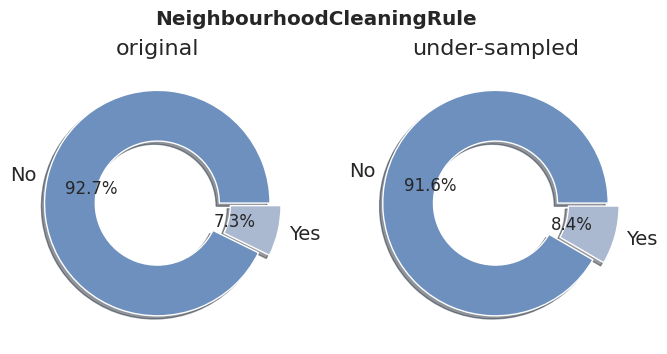

In [80]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = NeighbourhoodCleaningRule(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'NeighbourhoodCleaningRule')

In [81]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['NeighbourhoodCleaningRule'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.2577903682719547
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56413
           1       0.42      0.19      0.26      4420

    accuracy                           0.92     60833
   macro avg       0.68      0.58      0.61     60833
weighted avg       0.90      0.92      0.91     60833



### Combining Best Selecting and Cleaning Techniques

instances number before sampling: 425826
instances number after sampling: 61372
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5041224010949619


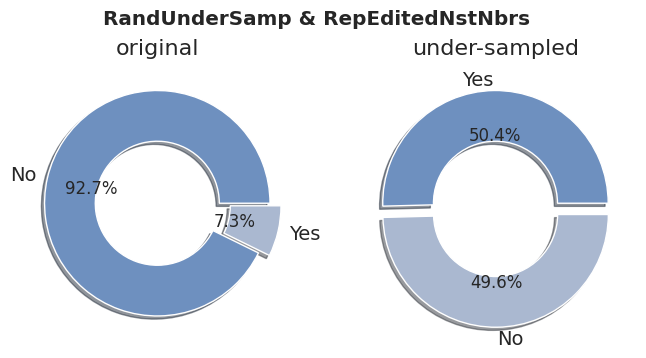

In [82]:
sampler  = RandomUnderSampler(sampling_strategy=0.5)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

sampler = RepeatedEditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_resampled, y_train_resampled)
y_train_resampled = pd.Series(y_train_resampled)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RandUnderSamp & RepEditedNstNbrs')

**Turns Out It's not a good idea :''**

In [83]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RandUnderSamp & RepEditedNstNbrs'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.25302361297753884
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     56413
           1       0.15      0.89      0.25      4420

    accuracy                           0.62     60833
   macro avg       0.57      0.74      0.50     60833
weighted avg       0.93      0.62      0.71     60833



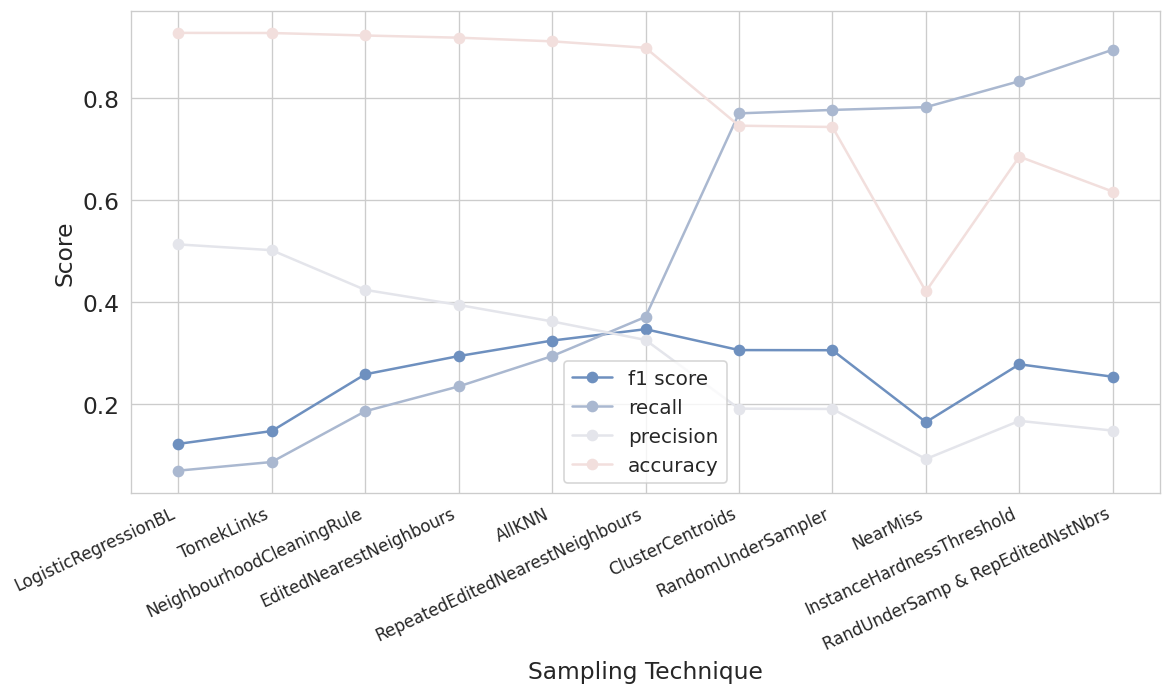

In [84]:
plt.figure(figsize=(10, 6), dpi = 120)
sampling_scores = pd.DataFrame(under_sampling_scores).T.sort_values(by = 'recall')


plt.plot(sampling_scores['f1 score'], marker = 'o', linewidth = 1.5, label = 'f1 score')
plt.plot(sampling_scores['recall'], marker = 'o', linewidth = 1.5, label = 'recall')
plt.plot(sampling_scores['precision'], marker = 'o', linewidth = 1.5, label = 'precision')
plt.plot(sampling_scores['accuracy'], marker = 'o', linewidth = 1.5, label = 'accuracy')

plt.xlabel('Sampling Technique')
plt.ylabel('Score')
plt.xticks(size=10,rotation=25, horizontalalignment='right',fontweight='light')
plt.legend()
plt.tight_layout(pad=1.2)
plt.show()

<a id="6"></a>

# <p> <center style="background-color:#b84848;font-family:Gabriola;color:white;font-size:200%;text-align:center;border-radius:0px">7. Choosing Best Model</center></p>


In [85]:
from imblearn.under_sampling import RandomUnderSampler

sampler  = RandomUnderSampler(sampling_strategy=0.25)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

In [88]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


classifiers = {
    #KNN
    'KNN': KNeighborsClassifier(n_neighbors=3),
    #linear models
    'LogisticRegression':LogisticRegression(random_state = 42, max_iter=1000),
    'SGDClassifier':SGDClassifier(random_state = 42),

    #tree-based models
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state = 42),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state = 42),

    #ensemble models
    'RandomForestClassifier': RandomForestClassifier(random_state = 42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state = 42),
    'LGBMClassifier':LGBMClassifier(random_state = 42, verbose=0),

}

In [89]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score

val_scores = dict()
train_scores = dict()

for clr in classifiers.keys():
    print(f'Training {clr} now.')
    classifiers[clr].fit(X_train_resampled, y_train_resampled)
    y_train_pred = classifiers[clr].predict(X_train_resampled)
    train_score = {
        'recall' : recall_score(y_train_resampled, y_train_pred, zero_division=0),
        'precision' : precision_score(y_train_resampled, y_train_pred, zero_division=0),
        'accuracy' : accuracy_score(y_train_resampled, y_train_pred),
        'f1_score' : f1_score(y_train_resampled, y_train_pred, zero_division=0),
        'auc_score': roc_auc_score(y_train_resampled, y_train_pred),
    }
    train_scores[clr] = train_score
    
    y_val_pred = classifiers[clr].predict(X_val_processed)
    val_score = {
        'recall' : recall_score(y_val, y_val_pred, zero_division=0),
        'precision' : precision_score(y_val, y_val_pred, zero_division=0),
        'accuracy' : accuracy_score(y_val, y_val_pred),
        'f1_score' : f1_score(y_val, y_val_pred, zero_division=0),
        'auc_score': roc_auc_score(y_val, y_val_pred),
    }
    val_scores[clr] = val_score
    print(f'f1 score train: {train_score["f1_score"]:.3f}, validation: {val_score["f1_score"]:.3f}')
    print('-'*50)


Training KNN now.
f1 score train: 0.659, validation: 0.279
--------------------------------------------------
Training LogisticRegression now.
f1 score train: 0.434, validation: 0.335
--------------------------------------------------
Training SGDClassifier now.
f1 score train: 0.286, validation: 0.249
--------------------------------------------------
Training DecisionTreeClassifier now.
f1 score train: 0.991, validation: 0.244
--------------------------------------------------
Training ExtraTreeClassifier now.
f1 score train: 0.991, validation: 0.244
--------------------------------------------------
Training RandomForestClassifier now.
f1 score train: 0.991, validation: 0.306
--------------------------------------------------
Training ExtraTreesClassifier now.
f1 score train: 0.991, validation: 0.283
--------------------------------------------------
Training LGBMClassifier now.
f1 score train: 0.458, validation: 0.341
--------------------------------------------------


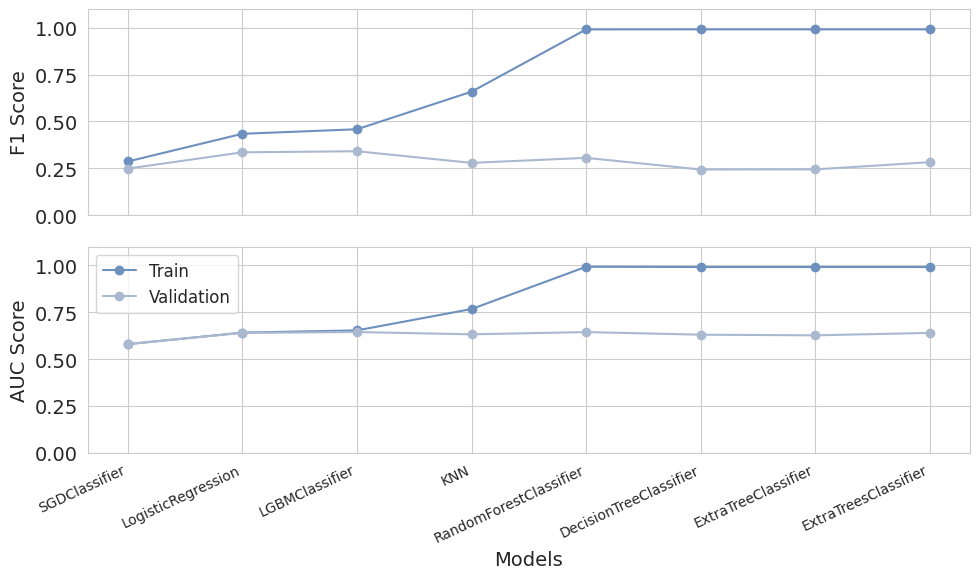

In [90]:
train_models_scores = pd.DataFrame(train_scores).T.sort_values(by = ['f1_score', 'auc_score',])
val_models_scores = pd.DataFrame(val_scores).T.loc[list(train_models_scores.index.values)]

fig, ax = plt.subplots(2, 1,sharex=True ,figsize=(10, 6))

ax[0].plot(train_models_scores['f1_score'], marker = 'o', linewidth = 1.5, label = 'Train')
ax[0].plot(val_models_scores['f1_score'], marker = 'o', linewidth = 1.5, label = 'Validation')
ax[0].set_ylabel('F1 Score')
ax[0].set_ylim([0, 1.1])

ax[1].plot(train_models_scores['auc_score'], marker = 'o', linewidth = 1.5, label = 'Train')
ax[1].plot(val_models_scores['auc_score'], marker = 'o', linewidth = 1.5, label = 'Validation')
ax[1].set_ylabel('AUC Score')
ax[1].set_ylim([0, 1.1])

plt.xlabel('Models')

plt.xticks(size=10,rotation=25, horizontalalignment='right',fontweight='light')
plt.legend()
plt.tight_layout(pad=1.2)
plt.show()

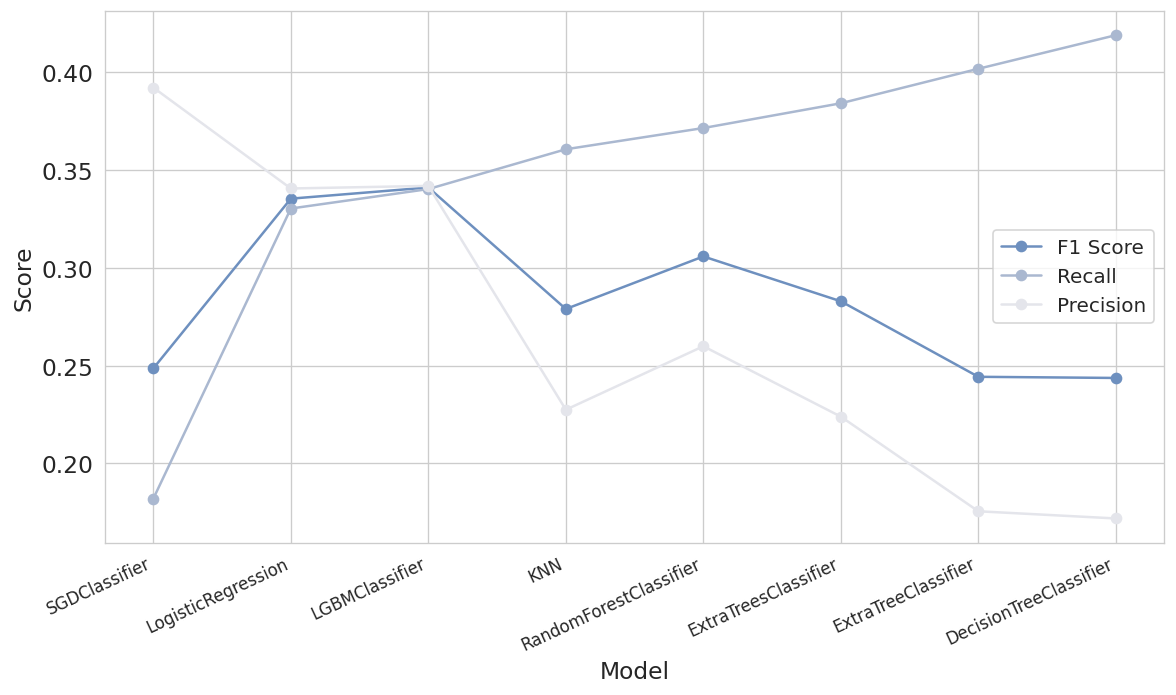

In [91]:
plt.figure(figsize=(10, 6), dpi = 120)
val_models_scores=val_models_scores.sort_values(by='recall')

plt.plot(val_models_scores['f1_score'], marker = 'o', linewidth = 1.5, label = 'F1 Score')
plt.plot(val_models_scores['recall'], marker = 'o', linewidth = 1.5, label = 'Recall')
plt.plot(val_models_scores['precision'], marker = 'o', linewidth = 1.5, label = 'Precision')

plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(size=10, rotation=25, horizontalalignment='right', fontweight='light')
plt.legend()
plt.tight_layout(pad=1.2)
plt.show()

<a id="7"></a>

# <p> <center style="background-color:#b84848;font-family:Gabriola;color:white;font-size:200%;text-align:center;border-radius:0px">8. Hyper-Parameter Tunning</center></p>


- **Grid Search for Sampling Ratio and Class Weights**

In [92]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.2)
strart_3_splits_index = []
for train_index, val_index in splitter.split(train.drop(columns= 'HeartDisease'), train['HeartDisease']):
    strart_3_splits_index.append((train_index, val_index))

In [93]:
param_grid = {
    'sampling_strategy': [0, 0.125, 0.5, 1.0],
    'class_weight': [dict({1: x, 0 : 1.0-x}) 
                                      for x in [0.5, 0.8, 0.9]],
}
grid_search_results = dict()

i=0
for smp_stgy in param_grid['sampling_strategy']:
    for clss_wght in param_grid['class_weight']:
        avg_f1_score=0.0
        print(f'sampling_strategy: {smp_stgy}, class1_weight: {clss_wght[1]}, ', end='')
        for fold_k in strart_3_splits_index:
            #train fold
            temp = train.iloc[fold_k[0]]
            X_train_fold, y_train_fold = temp.drop(columns= 'HeartDisease'), temp['HeartDisease']
            #preprocess train-set
            X_train_fold = preprocessing_pipeline.fit_transform(X_train_fold)
            y_train_fold = y_train_fold.map({'Yes':1, 'No':0})
            
            #validation fold
            temp = train.iloc[fold_k[1]]
            X_val_fold, y_val_fold = temp.drop(columns= 'HeartDisease'), temp['HeartDisease']
            #preprocess validation-set
            X_val_fold = preprocessing_pipeline.transform(X_val_fold)
            y_val_fold = y_val_fold.map({'Yes':1, 'No':0})
            
            
            #resampling train-set
            if smp_stgy==0:
                X, y = X_train_fold, y_train_fold
            else:
                sampler = RandomUnderSampler(sampling_strategy=smp_stgy, random_state=42)
                X, y = sampler.fit_resample(X_train_fold, y_train_fold)
            #fitting model
            clr = LGBMClassifier(random_state=42, class_weight=clss_wght, verbose=0)
            clr = clr.fit(X, y)
            
            #y_val_score
            y_val_fold_hat = clr.predict(X_val_fold)
            avg_f1_score +=f1_score(y_val_fold, y_val_fold_hat, zero_division=0)
            val_score = {
                'sampling_strategy': smp_stgy,
                'class1_weight': clss_wght[1],
                'f1_score' : f1_score(y_val_fold, y_val_fold_hat, zero_division=0),
                'recall' : recall_score(y_val_fold, y_val_fold_hat, zero_division=0),
                'precision' : precision_score(y_val_fold, y_val_fold_hat, zero_division=0),
                'accuracy' : accuracy_score(y_val_fold, y_val_fold_hat),
                'auc_score': roc_auc_score(y_val_fold, y_val_fold_hat),
            }
            grid_search_results[f'split_{i}'] = val_score
            i+=1
        print(f'average f1 score: {(avg_f1_score/3.0):.3f}')
        print('-'*75)


sampling_strategy: 0, class1_weight: 0.5, average f1 score: 0.086
---------------------------------------------------------------------------
sampling_strategy: 0, class1_weight: 0.8, average f1 score: 0.360
---------------------------------------------------------------------------
sampling_strategy: 0, class1_weight: 0.9, average f1 score: 0.325
---------------------------------------------------------------------------
sampling_strategy: 0.125, class1_weight: 0.5, average f1 score: 0.201
---------------------------------------------------------------------------
sampling_strategy: 0.125, class1_weight: 0.8, average f1 score: 0.349
---------------------------------------------------------------------------
sampling_strategy: 0.125, class1_weight: 0.9, average f1 score: 0.290
---------------------------------------------------------------------------
sampling_strategy: 0.5, class1_weight: 0.5, average f1 score: 0.349
--------------------------------------------------------------------

In [94]:
grid_search_results = pd.DataFrame(grid_search_results).T
grid_search_results.groupby(['sampling_strategy', 'class1_weight']).mean().sort_values(by='f1_score', ascending = False).head(5)

,,f1_score,recall,precision,accuracy,auc_score
sampling_strategy,class1_weight,,,,,
0.000,0.8,0.360253,0.434012,0.307933,0.888007,0.678795
0.500,0.5,0.348830,0.612637,0.243836,0.833811,0.731889
0.125,0.8,0.348684,0.612637,0.243692,0.833709,0.731834
0.000,0.9,0.325145,0.722527,0.209775,0.782080,0.754637
1.000,0.5,0.297698,0.807531,0.182491,0.723168,0.762044


<a id="9"></a>

# <p> <center style="background-color:#b84848;font-family:Gabriola;color:white;font-size:200%;text-align:center;border-radius:0px">9. Final Pipeline</center></p>


In [95]:
class_weights = {1:0.6, 0:0.4}
full_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('classifier', LGBMClassifier(class_weight=class_weights, random_state=42, verbose=0)),
])
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline0',
                                                  Pipeline(steps=[('transform',
                                                                   PowerTransformer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['BMI', 'SleepTime']),
                                                 ('num_pipeline1',
                                                  Pipeline(steps=[('transform',
                                                                   NRootTransformer(n=0.03125)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['PhysicalHealth',
                                                   'MentalHealth']),
                                                 ('ord_pipeline',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'GenHealth',
                                                   'PhysicalActivity', 'Stroke',
                                                   'Asthma', 'SkinCancer',
                                                   'Diabetic',
                                                   'AlcoholDrinking',
                                                   'AgeCategory',
                                                   'KidneyDisease', 'Smoking',
                                                   'DiffWalking']),
                                                 ('drop', 'drop', ['Race'])])),
                ('classifier',
                 LGBMClassifier(class_weight={0: 0.4, 1: 0.6}, random_state=42,
                                verbose=0))])

In [96]:
X_train_preprocessed = full_pipeline['preprocessor'].fit_transform(X_train)

instances number before sampling: 425826
instances number after sampling: 154695
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.2


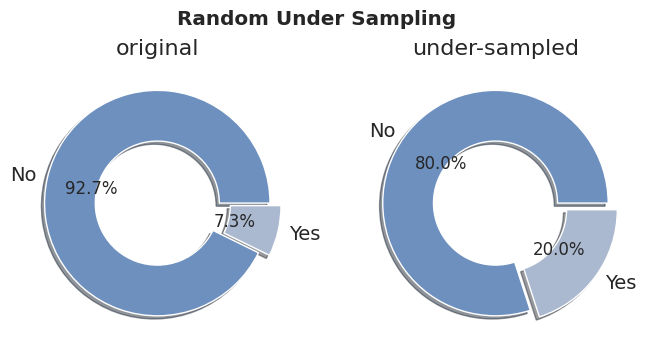

In [97]:
sampler  = RandomUnderSampler(sampling_strategy=0.25)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'Random Under Sampling')

In [98]:
full_pipeline['classifier'].fit(X_train_resampled, y_train_resampled)

LGBMClassifier(class_weight={0: 0.4, 1: 0.6}, random_state=42, verbose=0)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     56413
           1       0.28      0.51      0.36      4420

    accuracy                           0.87     60833
   macro avg       0.62      0.70      0.64     60833
weighted avg       0.91      0.87      0.89     60833



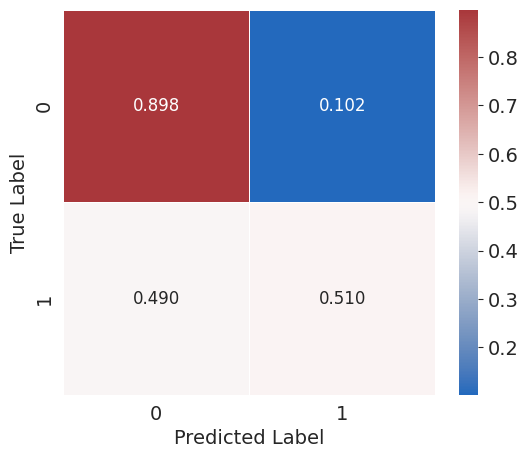

In [99]:
y_val_hat = full_pipeline['classifier'].predict(X_val_processed)
print(classification_report(y_val, y_val_hat))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, y_val_hat, normalize='true'),
            annot=True, fmt=".3f", linewidth=.5, cmap='vlag')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [100]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, x0, x1, rc):
    plt.plot(thresholds, precisions[:-1], "--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)   
    plt.grid(True)                     
    plt.axis([x0, x1, 0, 1.])
    precision_recall_rc = precisions[np.argmin(recalls >= rc)]
    threshold_recall_rc = thresholds[np.argmin(recalls >= rc)]

    plt.plot([threshold_recall_rc, threshold_recall_rc], [x0, rc], "b:")
    plt.plot([x0, threshold_recall_rc], [rc, rc], "b:")
    
    plt.plot([x0, threshold_recall_rc], [precision_recall_rc, precision_recall_rc], "b:")
    plt.plot([threshold_recall_rc], [rc], "bo")
    plt.plot([threshold_recall_rc], [precision_recall_rc], "bo")


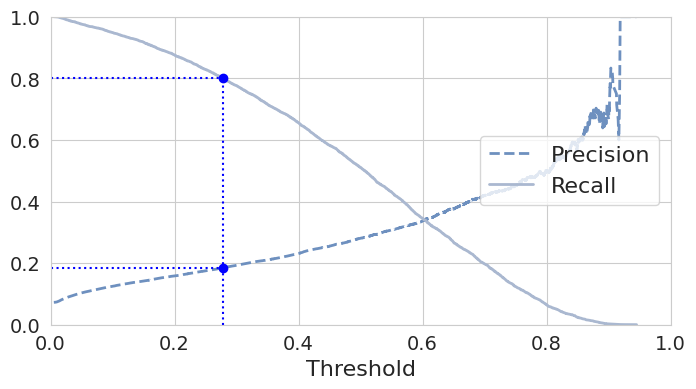

In [101]:
from sklearn.metrics import precision_recall_curve

y_val_score = full_pipeline['classifier'].predict_proba(X_val_processed)
precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_score[:, 1])

plt.figure(figsize=(8, 4))                                                          

plot_precision_recall_vs_threshold(precisions, recalls, thresholds, 0, 1, 0.80)
precision_recall_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_recall_80 = thresholds[np.argmin(recalls >= 0.80)]

plt.show()

In [102]:
y_val_rc80 = np.int16(y_val_score[:,1] > threshold_recall_80)
print(classification_report(y_val, y_val_rc80))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83     56413
           1       0.18      0.80      0.30      4420

    accuracy                           0.73     60833
   macro avg       0.58      0.76      0.57     60833
weighted avg       0.92      0.73      0.79     60833



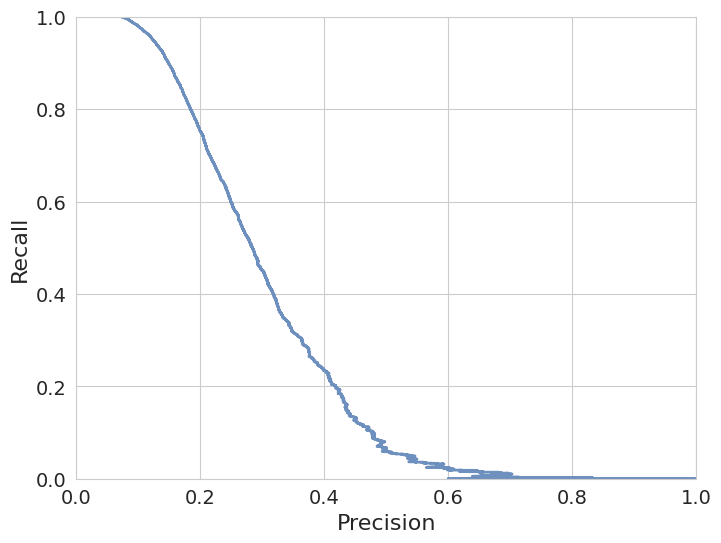

In [103]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(precisions, recalls, "-", linewidth=2)
    plt.ylabel("Recall", fontsize=16)
    plt.xlabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.90      0.93    112825
           1       0.28      0.51      0.36      8840

    accuracy                           0.87    121665
   macro avg       0.62      0.70      0.64    121665
weighted avg       0.91      0.87      0.89    121665



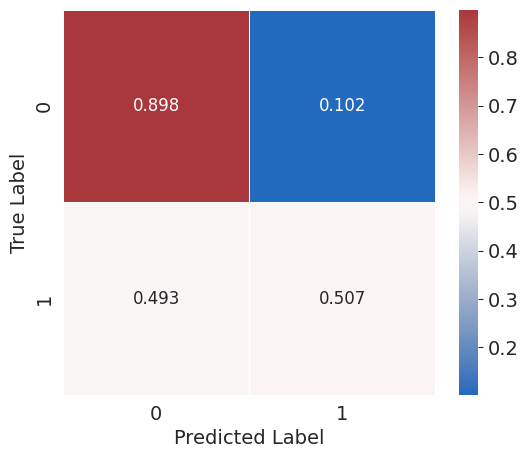

In [104]:
X_test_preprocessed = full_pipeline['preprocessor'].transform(X_test)
y_test_hat = full_pipeline['classifier'].predict(X_test_preprocessed)

print(classification_report(y_test, y_test_hat))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_hat, normalize='true'),
            annot=True, fmt=".3f", linewidth=.5, cmap='vlag')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [105]:
full_pipeline['classifier']

LGBMClassifier(class_weight={0: 0.4, 1: 0.6}, random_state=42, verbose=0)

In [106]:
import joblib

joblib.dump(full_pipeline, currentDir+'/LGBMRandUS_acc87.pkl') 

['/LGBMRandUS_acc87.pkl']

# K-Mean Clustering

In [107]:
df.head()

,Sex,AgeCategory,BMI,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
2,Female,80 or older,26.57,Excellent,No,0.0,0.0,6.0,No,No,No,No,No,Yes,No,No,White,No
3,Female,55-59,25.61,Very good,Yes,2.0,3.0,5.0,No,No,No,No,No,Yes,No,No,White,No
5,Female,40-44,21.77,Fair,Yes,2.0,0.0,9.0,No,No,Yes,No,No,No,No,No,White,No
6,Male,80 or older,26.08,Poor,No,1.0,0.0,7.0,No,No,No,No,No,No,Yes,Yes,White,Yes
7,Female,80 or older,22.96,Very good,Yes,0.0,0.0,7.0,No,No,Yes,No,No,No,No,No,Black,No


In [108]:
# get catatgorial columns
cat_cols = df.select_dtypes(include=['object']).columns
# get numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
# apply label encoder
df= df.apply(LabelEncoder().fit_transform)

### correlation between the features
to get most important features

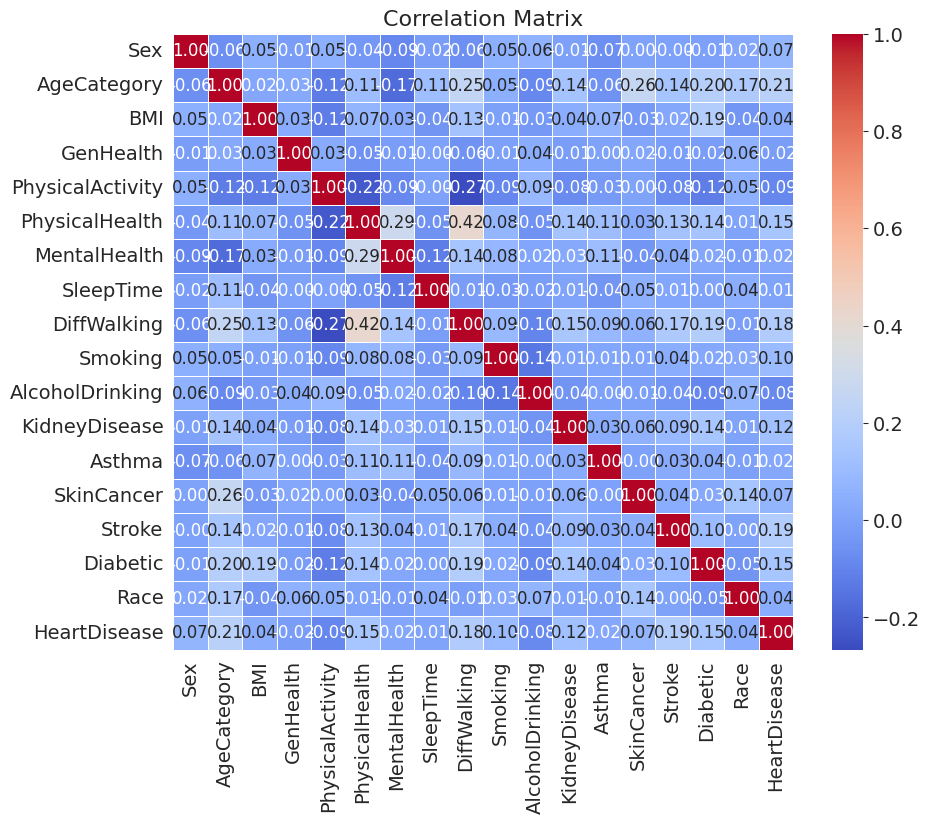

Top three features with strongest correlation with the last column:
Index(['AgeCategory', 'Stroke'], dtype='object')


In [109]:

# Assuming 'df' is your DataFrame
corr = df.corr()

# Sort correlations with the last column (assuming it's the target column)
target_corr = corr.iloc[-1, :-1].abs().sort_values(ascending=False)

# Select the top three features with the strongest correlation
top_three_features = target_corr.index[:2]

# Plot the correlation matrix with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print("Top three features with strongest correlation with the last column:")
print(top_three_features)


In [110]:
# Select features and sample data
features = ['BMI', 'AgeCategory']
clustring_data = df[features]
# clustring_data=pd.DataFrame(X_train_resampled,columns=df.columns[:-2]).sample(5000)
# clustring_data=clustring_data[features]
clustring_data

,BMI,AgeCategory
2,1191,12
3,1102,7
5,728,4
6,1145,12
7,845,12
...,...,...
764921,772,0
764922,1272,8
764923,1501,3
764924,968,5


In [111]:
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustring_data)

# Perform k-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)
labels = kmeans.predict(scaled_data)



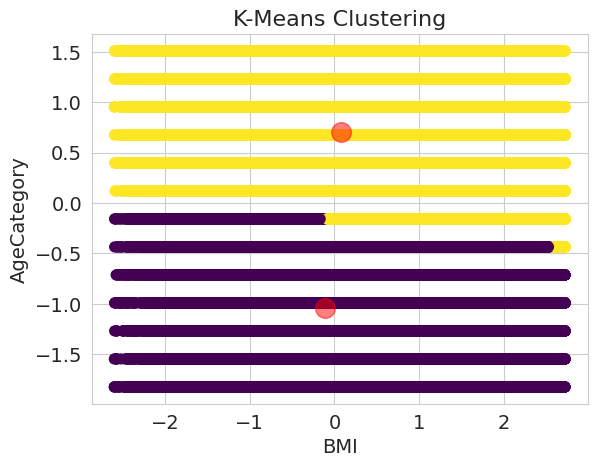

In [112]:
# Plot the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, s=50, cmap='viridis')
# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-Means Clustering')
plt.show()

In [114]:
from sklearn.metrics import  adjusted_rand_score, homogeneity_completeness_v_measure
inertia = kmeans.inertia_
ari = adjusted_rand_score(df['HeartDisease'], labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(df['HeartDisease'], labels)

print("Inertia:", inertia)
print("Adjusted Rand Index (ARI):", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-measure:", v_measure)

Inertia: 764940.2120969786
Adjusted Rand Index (ARI): -0.021772659111610936
Homogeneity: 0.07716773228583541
Completeness: 0.029758812644780943
V-measure: 0.04295322716743378
